# clase 4

## (1) Datos de Glottolog

In [1]:
## usamos pandas para leer los datos

import pandas as pd

In [2]:
## diccionario iso:glottocode
## https://glottolog.org/meta/downloads

langs = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [3]:
## filtramos por lenguas de las Américas

macroarea = langs[['glottocode','macroarea']]
macroarea = macroarea.dropna()

In [4]:
## creamos un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['glottocode'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America','North America']}

In [5]:
print(len(macroarea))

2382


In [6]:
## familias de las Américas

In [7]:
## miramos languoids

languoid = pd.read_csv('languoid.csv',sep=',')

In [8]:
languoid

id family_id parent_id                 name  bookkeeping  \
0      3adt1234  afro1255  nort3292           3Ad-Tekles        False   
1      aala1237  aust1307  ramo1244               Aalawa        False   
2      aant1238  nucl1709  nort2920           Aantantara        False   
3      aari1238  sout2845  ahkk1235           Aari-Gayil        False   
4      aari1239  sout2845  aari1238                 Aari        False   
...         ...       ...       ...                  ...          ...   
25223  zuti1239  tupi1275  guaj1255  Guajajára of Zutiua        False   
25224  zuwa1238  koia1260  omie1241              Zuwadza        False   
25225  zwal1238  atla1278  shal1242                Zwall        False   
25226  zyph1238  sino1245  nucl1757                Zyphe        False   
25227  zyud1238  ural1272  komi1269              Zyuzdin        False   

          level  latitude  longitude iso639P3code  description  \
0       dialect       NaN        NaN          NaN          NaN   
1       dialect       NaN        NaN          NaN          NaN   
2       dialect       NaN        NaN          NaN          NaN   
3        family       NaN        NaN          aiz          NaN   
4      language   5.95034    36.5721          aiw          NaN   
...         ...       ...        ...          ...          ...   
25223   dialect       NaN        NaN          NaN          NaN   
25224   dialect       NaN        NaN          NaN          NaN   
25225   dialect       NaN        NaN          NaN          NaN   
25226  language  22.52400    93.2640          zyp          NaN   
25227   dialect       NaN        NaN          NaN          NaN   

       markup_description  child_family_count  child_language_count  \
0                     NaN                   0                     0   
1                     NaN                   0                     0   
2                     NaN                   0                     0   
3                     NaN                   0                     2   
4                     NaN                   0                     0   
...                   ...                 ...                   ...   
25223                 NaN                   0                     0   
25224                 NaN                   0                     0   
25225                 NaN                   0                     0   
25226                 NaN                   0                     0   
25227                 NaN                   0                     0   

       child_dialect_count country_ids  
0                        0         NaN  
1                        0         NaN  
2                        0         NaN  
3                        0         NaN  
4                        0          ET  
...                    ...         ...  
25223                    0         NaN  
25224                    0         NaN  
25225                    0         NaN  
25226                    2       IN MM  
25227                    0         NaN  

[25228 rows x 15 columns]

In [9]:
## filtramos id:family_id (family)

location = languoid[['id','latitude','longitude']]
location = location.dropna()

In [10]:
location_lat = dict(zip(location['id'],location['latitude']))
location_lon = dict(zip(location['id'],location['longitude']))

In [11]:
location = {key:[location_lat[key],location_lon[key]] for key in location_lat.keys()}

In [12]:
len(location)

8402

In [13]:
## filtramos id:family_id (family)

id_family = languoid[['id','family_id']]
id_family = id_family.dropna()

In [14]:
## filtramos id:parent_id (genus)

glotto_iso = languoid[['id','iso639P3code']]
glotto_iso = glotto_iso.dropna()

In [15]:
## transformamos a diccionario

glotto_iso = dict(zip(glotto_iso['id'], glotto_iso['iso639P3code']))
glotto_iso = {language:glotto_iso[language] for language in glotto_iso.keys() if language in macroarea.keys()}

In [16]:
## transformamos a diccionario

id_family = dict(zip(id_family['id'], id_family['family_id']))
ID_family = {language:id_family[language] for language in id_family.keys() if  language in macroarea.keys()}

In [17]:
len(id_family)

24799

In [18]:
id_family['huil1244']

'arau1255'

## (2) Datos de SAILS

In [19]:
## rasgos

features_sails = pd.read_csv('features_sails.csv',sep=',')

In [20]:
features_sails=features_sails.rename(columns={'Unnamed: 0': 'features'})

In [21]:
len(list(features_sails.columns[1:]))

167

In [22]:
features=list(features_sails['features'])

In [23]:
features_pred = {}

for language in list(features_sails.columns[1:]):
    features_pred[language]=dict(zip(features,list(features_sails[language])))

In [24]:
for language in features_pred:
    D=features_pred[language]
    D={k: v for k, v in D.items() if pd.Series(v).notna().all()}
    D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key][-2:]!='NA' and D[key].startswith('ARGEX5')==True} ## estructura argumental
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key].startswith('TAME')==True} ## tame
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key][-2:]!='NA' and D[key].startswith('AND')==True}## todo sin arawak + andean specific
    
    features_pred[language]=D

In [25]:
features_pred = {key:features_pred[key] for key in features_pred.keys() if len(features_pred[key])>0}

In [26]:
print(features_pred.keys())

dict_keys(['agua1253', 'yane1238', 'apur1254', 'apal1257', 'arhu1242', 'mapu1245', 'karo1305', 'araw1276', 'awet1244', 'cent2142', 'bora1263', 'boro1282', 'baur1253', 'chip1262', 'mose1249', 'cavi1250', 'call1235', 'chim1309', 'chay1248', 'chol1284', 'coca1259', 'colo1256', 'cube1242', 'desa1247', 'emer1243', 'nort2972', 'guat1253', 'gavi1246', 'hixk1239', 'inga1252', 'iton1250', 'jama1261', 'shua1257', 'jaqa1244', 'hupd1244', 'juru1256', 'kama1373', 'kana1291', 'kari1311', 'daww1239', 'awac1239', 'kano1245', 'leco1242', 'lako1248', 'sate1243', 'mats1244', 'moco1246', 'maku1278', 'wich1262', 'muni1258', 'mund1330', 'movi1243', 'moch1259', 'pare1272', 'wari1268', 'paez1247', 'pila1245', 'puin1248', 'hual1241', 'sout2991', 'sout2990', 'sant1432', 'tena1240', 'yauy1235', 'ayac1239', 'cusc1236', 'caja1238', 'imba1240', 'nort2980', 'paca1245', 'sanm1289', 'huay1240', 'sala1272', 'jauj1238', 'cane1242', 'rikb1245', 'saba1268', 'nina1238', 'ship1254', 'saki1248', 'tari1256', 'tehu1242', 'tapi

In [27]:
print(len(features_pred))

95


In [28]:
features_pred = {key:features_pred[key] for key in features_pred.keys() if len(features_pred[key])==9}# and key in id_family.keys()}

In [29]:
print(len(features_pred))

88


In [30]:
location = {key:location[key] for key in features_pred.keys()}

In [31]:
points = [(location_lon[key],location_lat[key]) for key in location.keys()]

In [32]:
for language in features_pred.keys():
    print(language,len(features_pred[language]))

agua1253 9
yane1238 9
apur1254 9
apal1257 9
arhu1242 9
mapu1245 9
karo1305 9
araw1276 9
awet1244 9
cent2142 9
bora1263 9
boro1282 9
baur1253 9
chip1262 9
mose1249 9
cavi1250 9
chay1248 9
chol1284 9
coca1259 9
colo1256 9
cube1242 9
desa1247 9
emer1243 9
nort2972 9
guat1253 9
hixk1239 9
inga1252 9
iton1250 9
jama1261 9
hupd1244 9
juru1256 9
kama1373 9
kari1311 9
daww1239 9
awac1239 9
kano1245 9
leco1242 9
lako1248 9
sate1243 9
mats1244 9
moco1246 9
maku1278 9
wich1262 9
mund1330 9
movi1243 9
moch1259 9
pare1272 9
wari1268 9
paez1247 9
pila1245 9
puin1248 9
hual1241 9
sout2991 9
sout2990 9
sant1432 9
tena1240 9
yauy1235 9
ayac1239 9
cusc1236 9
caja1238 9
imba1240 9
nort2980 9
paca1245 9
sanm1289 9
huay1240 9
sala1272 9
jauj1238 9
cane1242 9
rikb1245 9
saba1268 9
nina1238 9
ship1254 9
saki1248 9
tari1256 9
tehu1242 9
tapi1253 9
trum1247 9
trio1238 9
ikpe1245 9
urar1246 9
uruu1244 9
wara1303 9
wayo1238 9
xava1240 9
kwaz1243 9
yami1256 9
nhen1239 9
yura1255 9


familias de las Américas

In [33]:
len(id_family)

24799

In [34]:
id_family = {}

for key in features_pred.keys():
    if key in ID_family.keys():
        id_family[key]=ID_family[key]
    else:
        id_family[key]='unknown'

In [35]:
len(id_family)

88

In [36]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(id_family.items()):
    v[value].append(key)

In [37]:
families = dict(v)

In [38]:
len(families['araw1281'])

6

In [39]:
families

{'jiva1245': ['agua1253'],
 'cari1283': ['apal1257', 'hixk1239', 'ikpe1245', 'trio1238'],
 'araw1281': ['apur1254',
  'araw1276',
  'baur1253',
  'pare1272',
  'tari1256',
  'yane1238'],
 'chib1249': ['arhu1242'],
 'barb1265': ['awac1239', 'colo1256'],
 'tupi1275': ['awet1244',
  'coca1259',
  'emer1243',
  'juru1256',
  'kama1373',
  'kari1311',
  'karo1305',
  'maku1278',
  'mund1330',
  'nhen1239',
  'saki1248',
  'sate1243',
  'tapi1253',
  'wayo1238'],
 'quec1387': ['ayac1239',
  'caja1238',
  'cusc1236',
  'hual1241',
  'huay1240',
  'imba1240',
  'inga1252',
  'jauj1238',
  'nort2980',
  'paca1245',
  'sala1272',
  'sanm1289',
  'sant1432',
  'sout2990',
  'sout2991',
  'tena1240',
  'yauy1235'],
 'bora1262': ['bora1263'],
 'boro1281': ['boro1282'],
 'nucl1710': ['cane1242', 'rikb1245', 'xava1240'],
 'pano1259': ['cavi1250', 'mats1244', 'ship1254', 'yami1256'],
 'ayma1253': ['cent2142'],
 'cahu1265': ['chay1248'],
 'uruc1242': ['chip1262', 'uruu1244'],
 'hibi1242': ['chol1284'],

In [40]:
import numpy as np

L=[]
for fam in families.keys():
    L+=[len(families[fam])]
    print(fam,len(families[fam]))
print(np.mean(L))

jiva1245 1
cari1283 4
araw1281 6
chib1249 1
barb1265 2
tupi1275 14
quec1387 17
bora1262 1
boro1281 1
nucl1710 3
pano1259 4
ayma1253 1
cahu1265 1
uruc1242 2
hibi1242 1
tuca1253 2
nada1235 2
unknown 14
araw1282 1
namb1299 2
arau1255 1
guai1249 2
yano1268 1
choc1280 1
chon1288 1
chap1271 1
mata1289 1
3.259259259259259


## (3) Distancias de Hamming

In [41]:
def hamming(glotto1,glotto2):
    d = 0
    n = 0
    language1 = features_pred[glotto1]
    language2 = features_pred[glotto2]
    for feat in language1.keys():
        if feat in language2.keys():
            if language1[feat] != language2[feat]:
                d += 1.0
            n += 1.0
    return d/n

In [42]:
families = ['araw1281','tupi1275','quec1387','nucl1710','pano1259','cari1283','ayma1253','chon1288','chib1249','cahu1265']

In [43]:
colors = {x:y for x,y in zip(families,[['m','o'],['orange','D'],['r','s'],['yellow','X'],['cyan','*']
                                      ,['gold','H'],['salmon','>'],['palegreen','<'],['fuchsia','8'],['b','d']])}

In [44]:
!pip install -U libpysal

In [45]:
import libpysal

In [47]:
from libpysal.weights import Voronoi
N = Voronoi(points).neighbors

C:\Users\jxver\anaconda3\envs\geo_env\lib\site-packages\libpysal\cg\alpha_shapes.py:574: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.
  warn(NUMBA_WARN)


In [48]:
neighbors = {}
for L in list(location.keys()):
    neighbors[L]=[list(location.keys())[n] for n in N[list(location.keys()).index(L)]]

In [49]:
neighbors['mapu1245']

['tehu1242', 'sant1432']

In [50]:
x,y = [],[]
codes = []

for key in location.keys():
    codes+=[key]
    x+=[location[key][1]]
    y+=[location[key][0]]

In [51]:
import geopandas

In [52]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [53]:
world = world[world['continent']=='South America']

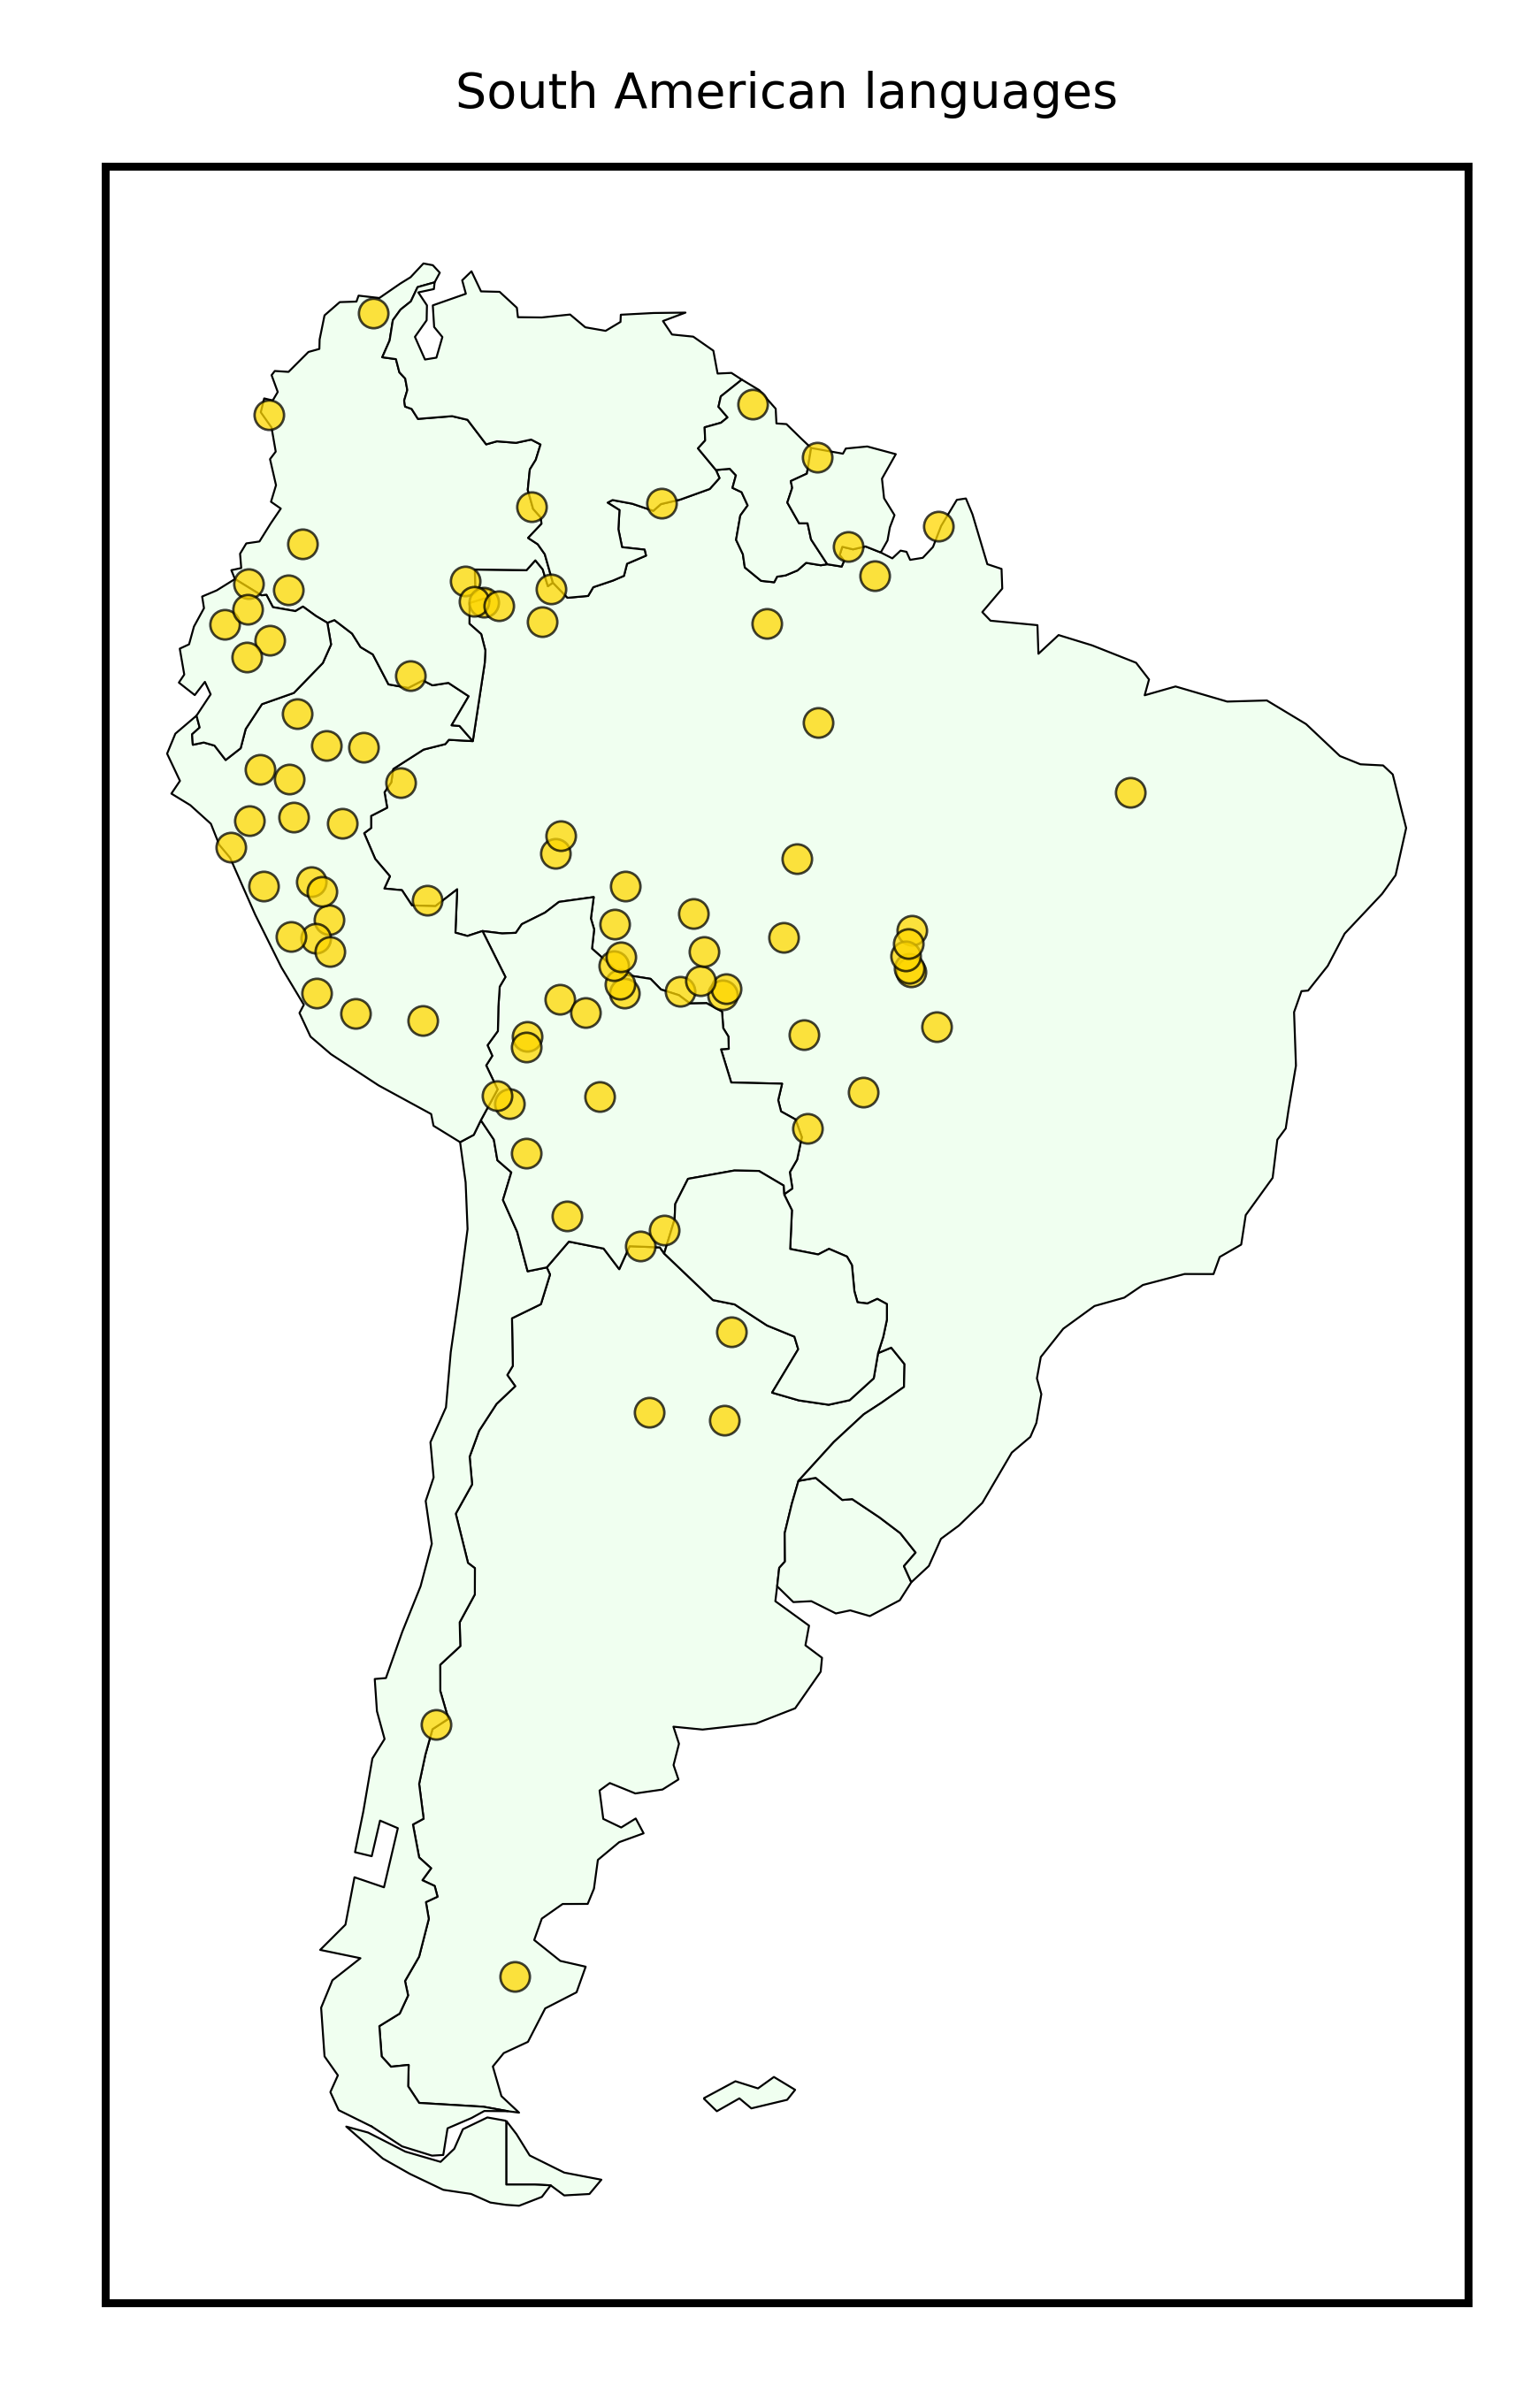

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('South American languages',fontsize=5)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)

#for group in labels_group.keys():
    
#    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='none',clip_on=True,label=group)

#for language in location.keys():
#    if language in languages_conflict:
#        ax.annotate(max(probs[language].round(2)), weight='demi', color='k', xy=(location[language][1],location[language][0]), fontsize=2.5, alpha=0.85)

ax.plot([x[i] for i in [list(location.keys()).index(language) for language in location.keys()]],[y[i] for i in [list(location.keys()).index(language) for language in location.keys()]],marker='o',color='gold',markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True)

#ax.plot([x[i] for i in [list(LL_families.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'*',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')
#ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],marker='x',color='k',markersize=3,markeredgewidth=1,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.legend(loc='best',fontsize=3)
ax.set_yticks([])
ax.set_xticks([])
#plt.savefig('map.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [56]:
from libpysal.cg.voronoi  import voronoi, voronoi_frames

region_df, point_df = voronoi_frames(points)

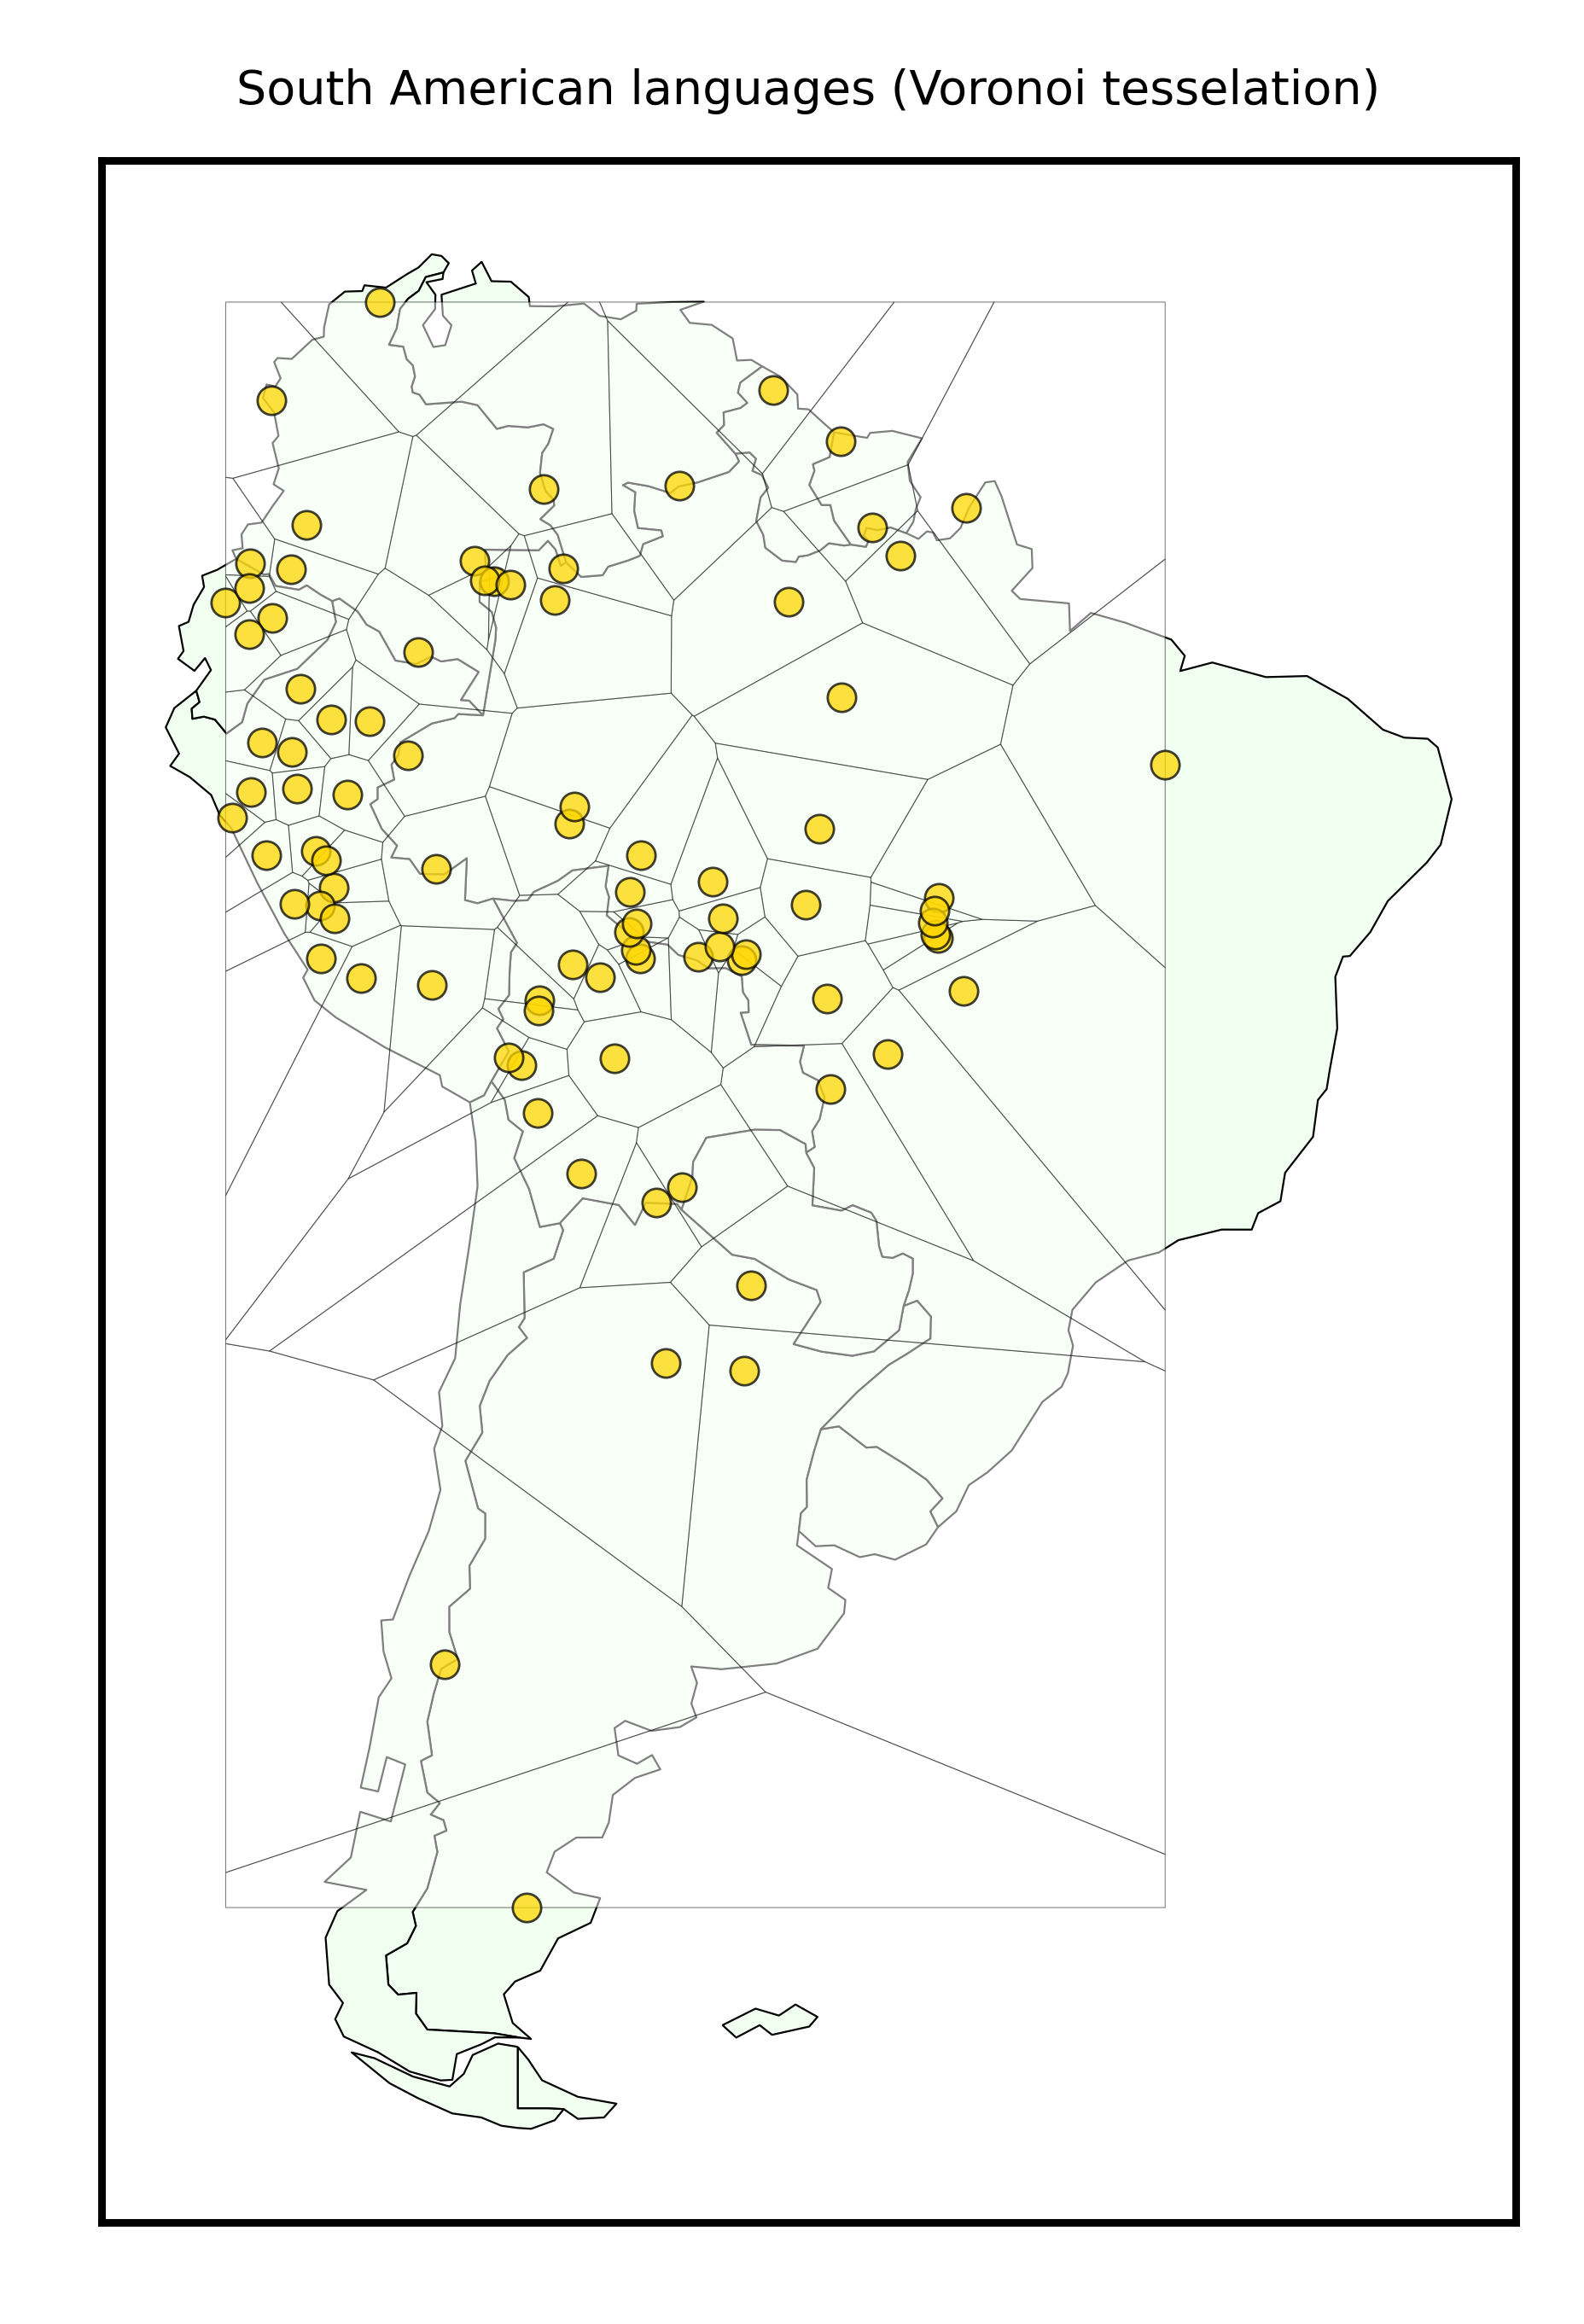

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('South American languages (Voronoi tesselation)',fontsize=5)
world.plot(ax=ax, color='honeydew', edgecolor='k',linewidth=0.2)
region_df.plot(ax=ax, color='white',edgecolor='black', linewidth=0.1, alpha=0.5)   
#point_df.plot(ax=ax, color='red')

#for group in labels_group.keys():
    
#    ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if language in labels.keys() and labels[language]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='none',clip_on=True,label=group)

#for language in location.keys():
#    if language in languages_conflict:
#        ax.annotate(max(probs[language].round(2)), weight='demi', color='k', xy=(location[language][1],location[language][0]), fontsize=2.5, alpha=0.85)

ax.plot([x[i] for i in [list(location.keys()).index(language) for language in location.keys()]],[y[i] for i in [list(location.keys()).index(language) for language in location.keys()]],marker='o',color='gold',markersize=3,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True)

#ax.plot([x[i] for i in [list(LL_families.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if macroarea[language]=='North America']],'*',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='North America')
#ax.plot([y[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],[x[i] for i in [list(location.keys()).index(language) for language in location.keys() if (language not in id_family.keys()) or (language in id_family.keys() and id_family[language] not in families)]],marker='x',color='k',markersize=3,markeredgewidth=1,markeredgecolor='k',alpha=0.65,linewidth=0,fillstyle='full',clip_on=True,label='Others')

#plt.legend(loc='best',fontsize=3)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('map-voronoi.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## (4) Representación usando grafos

In [58]:
## grafos!!!
import networkx as nx

def GRAPH_knn(D):
                   
    G=nx.Graph()
    for key in D.keys():
        #minval = max(D[key].values())
        #D_ordered = [k for k, v in D[key].items() if v==minval]
        neigh = D[key]
        for keykey in neigh:
            if G.has_edge(key,keykey)==False:
                G.add_edge(key,keykey,weight=hamming(key,keykey))

    return G

In [62]:
import random

def GRAPH_random(D):
                   
    G=nx.Graph()
    for key in D.keys():
        #minval = max(D[key].values())
        #D_ordered = [k for k, v in D[key].items() if v==minval]
        neigh = D[key]
        for keykey in neigh:
            if G.has_edge(key,keykey)==False:
                G.add_edge(key,keykey,weight=random.random())

    return G

In [63]:
G=GRAPH_knn(neighbors)

In [64]:
Gr=GRAPH_random(neighbors)

In [65]:
print(len(G),len(G.edges()))

88 222


In [66]:
print(len(Gr),len(Gr.edges()))

88 222


In [67]:
G['mapu1245']

AtlasView({'tehu1242': {'weight': 0.5555555555555556}, 'sant1432': {'weight': 0.5555555555555556}})

In [69]:
Gr['mapu1245']

AtlasView({'tehu1242': {'weight': 0.01975730286442423}, 'sant1432': {'weight': 0.5849193772471625}})

In [70]:
#!pip install pydot

In [71]:
G=nx.minimum_spanning_tree(G,weight='weight')

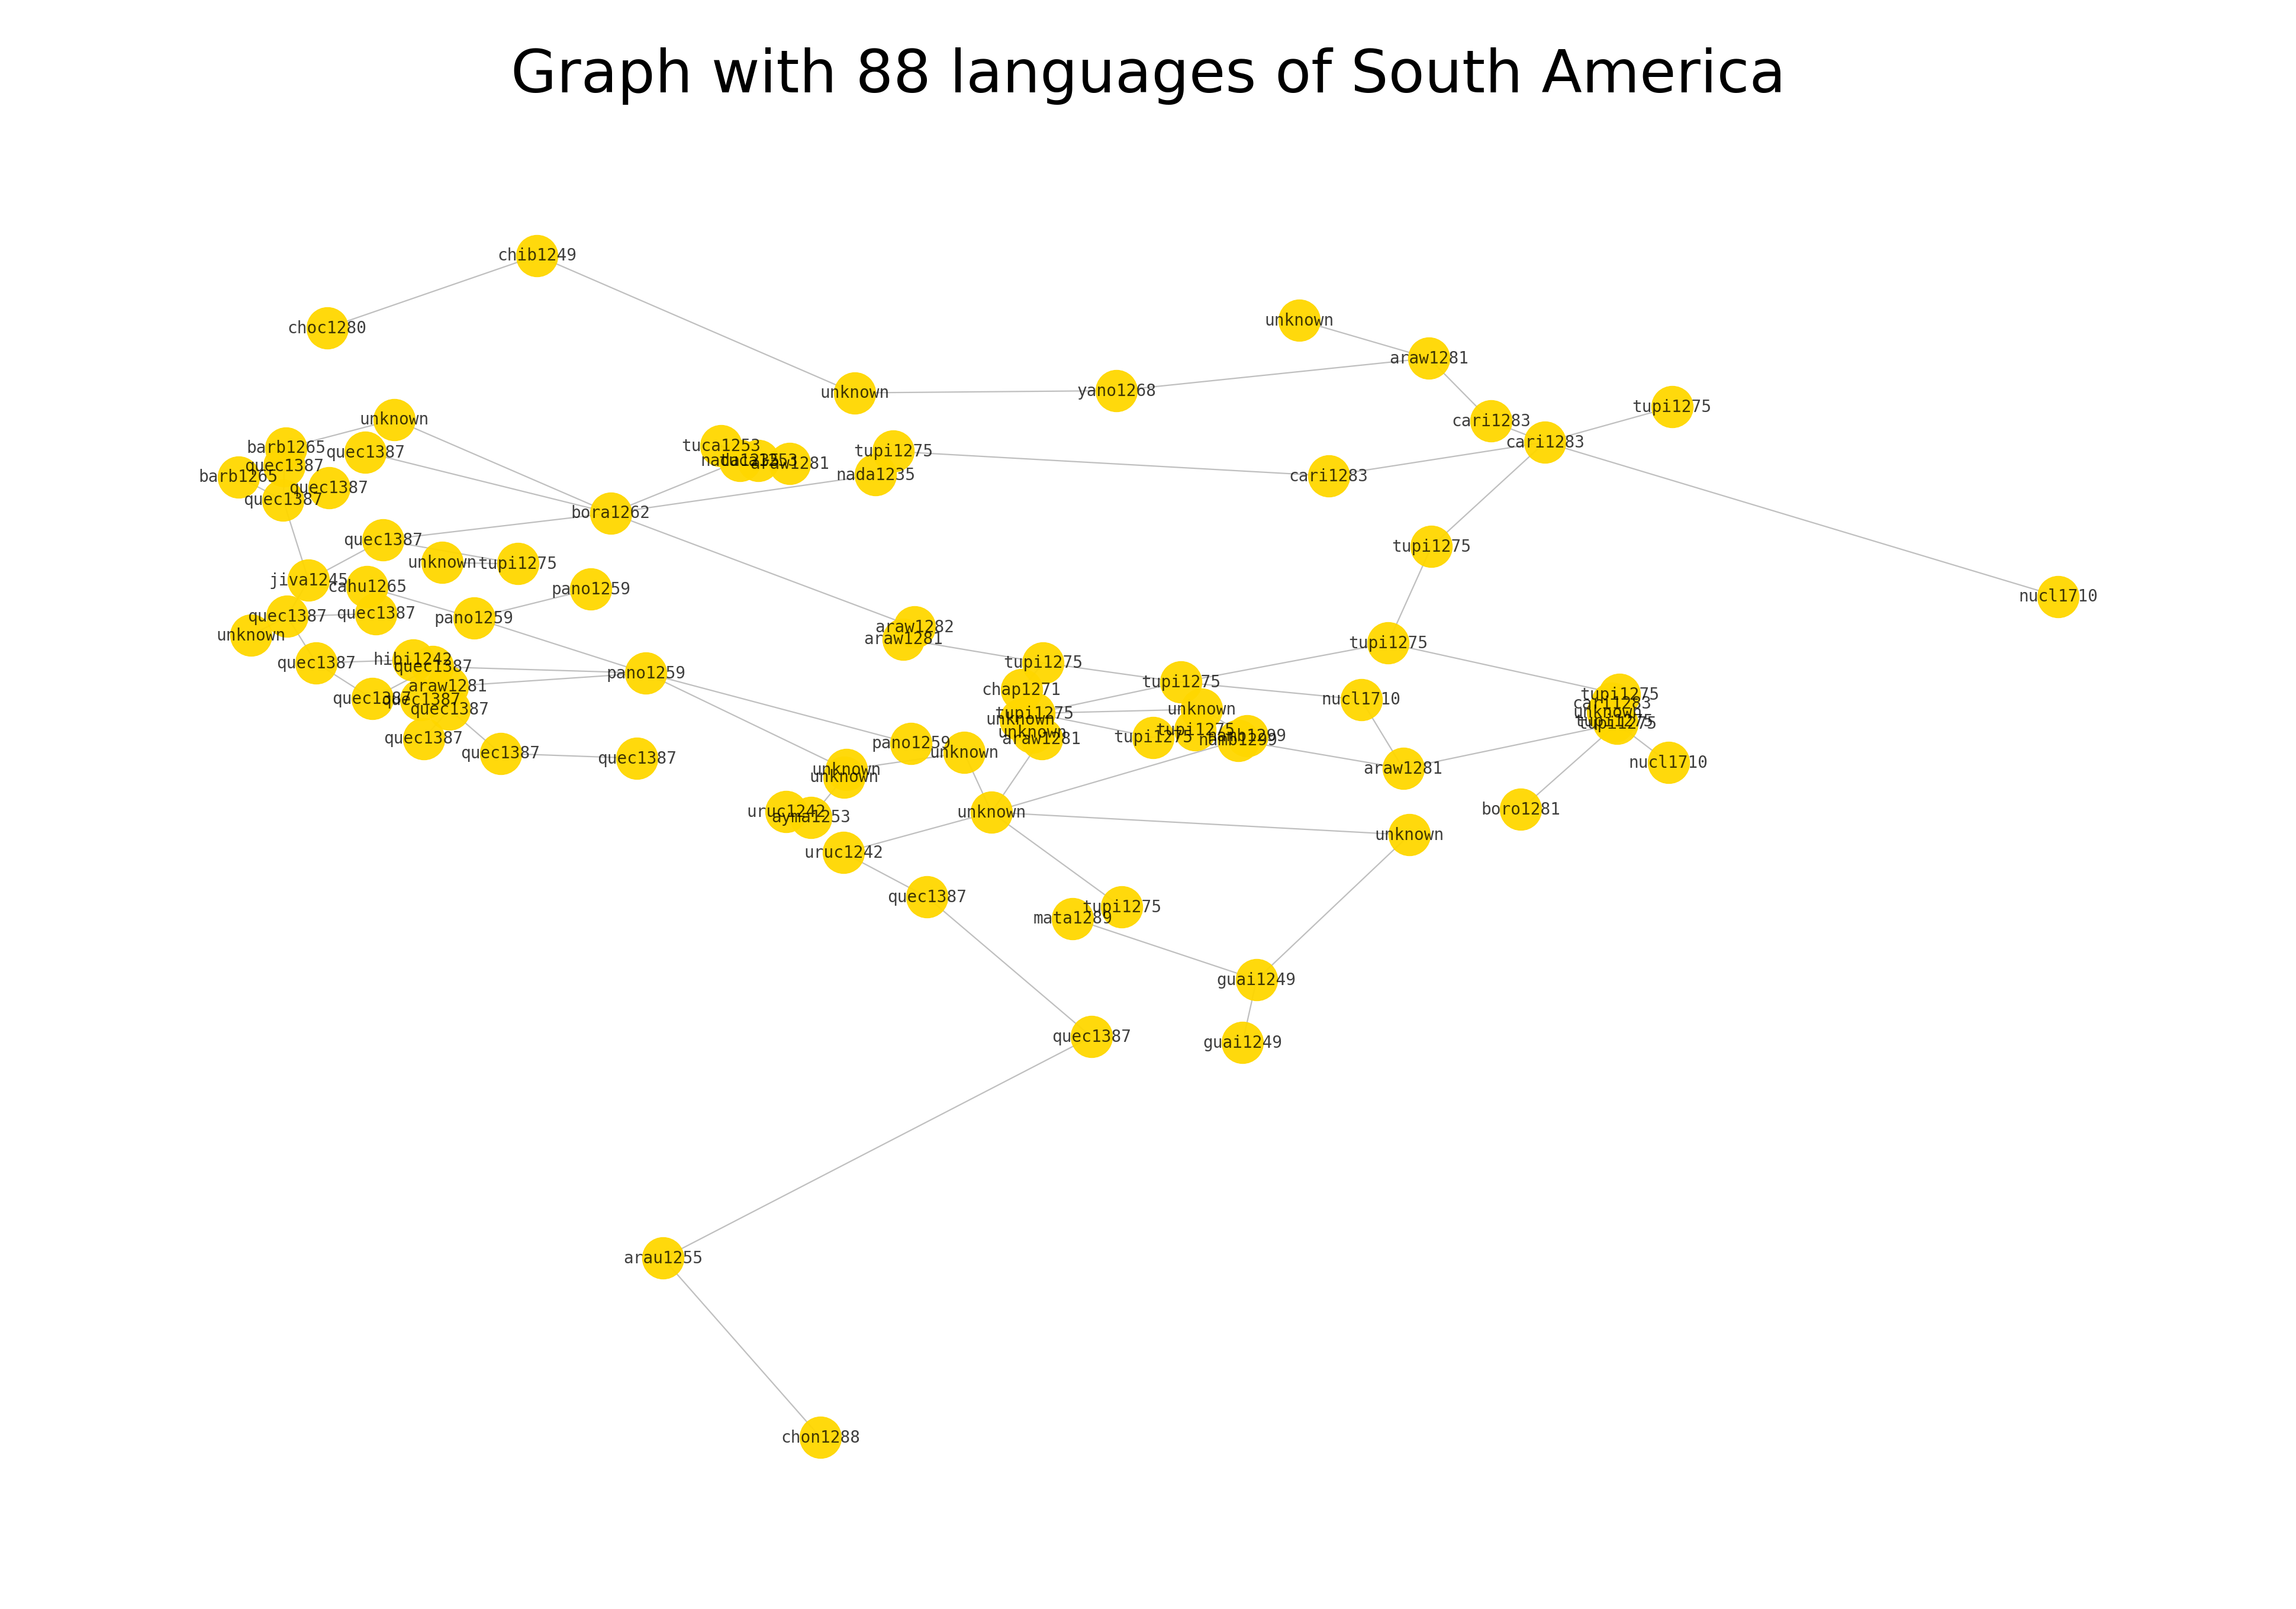

In [73]:
fig, ax = plt.subplots(dpi=800)
labels = {i:id_family[i] for i in G.nodes()}# if id_family[i] in ['quec1387','jiva1245','pano1259']}
        
pos = {key:[location[key][1],location[key][0]] for key in location.keys()}#nx.spring_layout(G)
#pos = {key:location[key] for key in g.nodes()}#nx.spectral_layout(g)
#pos = {node: (y,x) for (node, (x,y)) in pos.items()}

nx.draw_networkx_nodes(G, pos, node_size = 40, node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='gray')
nx.draw_networkx_labels(G,pos,labels,alpha=0.75,font_size=2.5,font_color='k',font_family='monospace')
plt.axis('off')
plt.title('Graph with '+str(len(G))+' languages of South America',fontsize=9)
plt.savefig('graph.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [74]:
Gr=nx.minimum_spanning_tree(Gr,weight='weight')

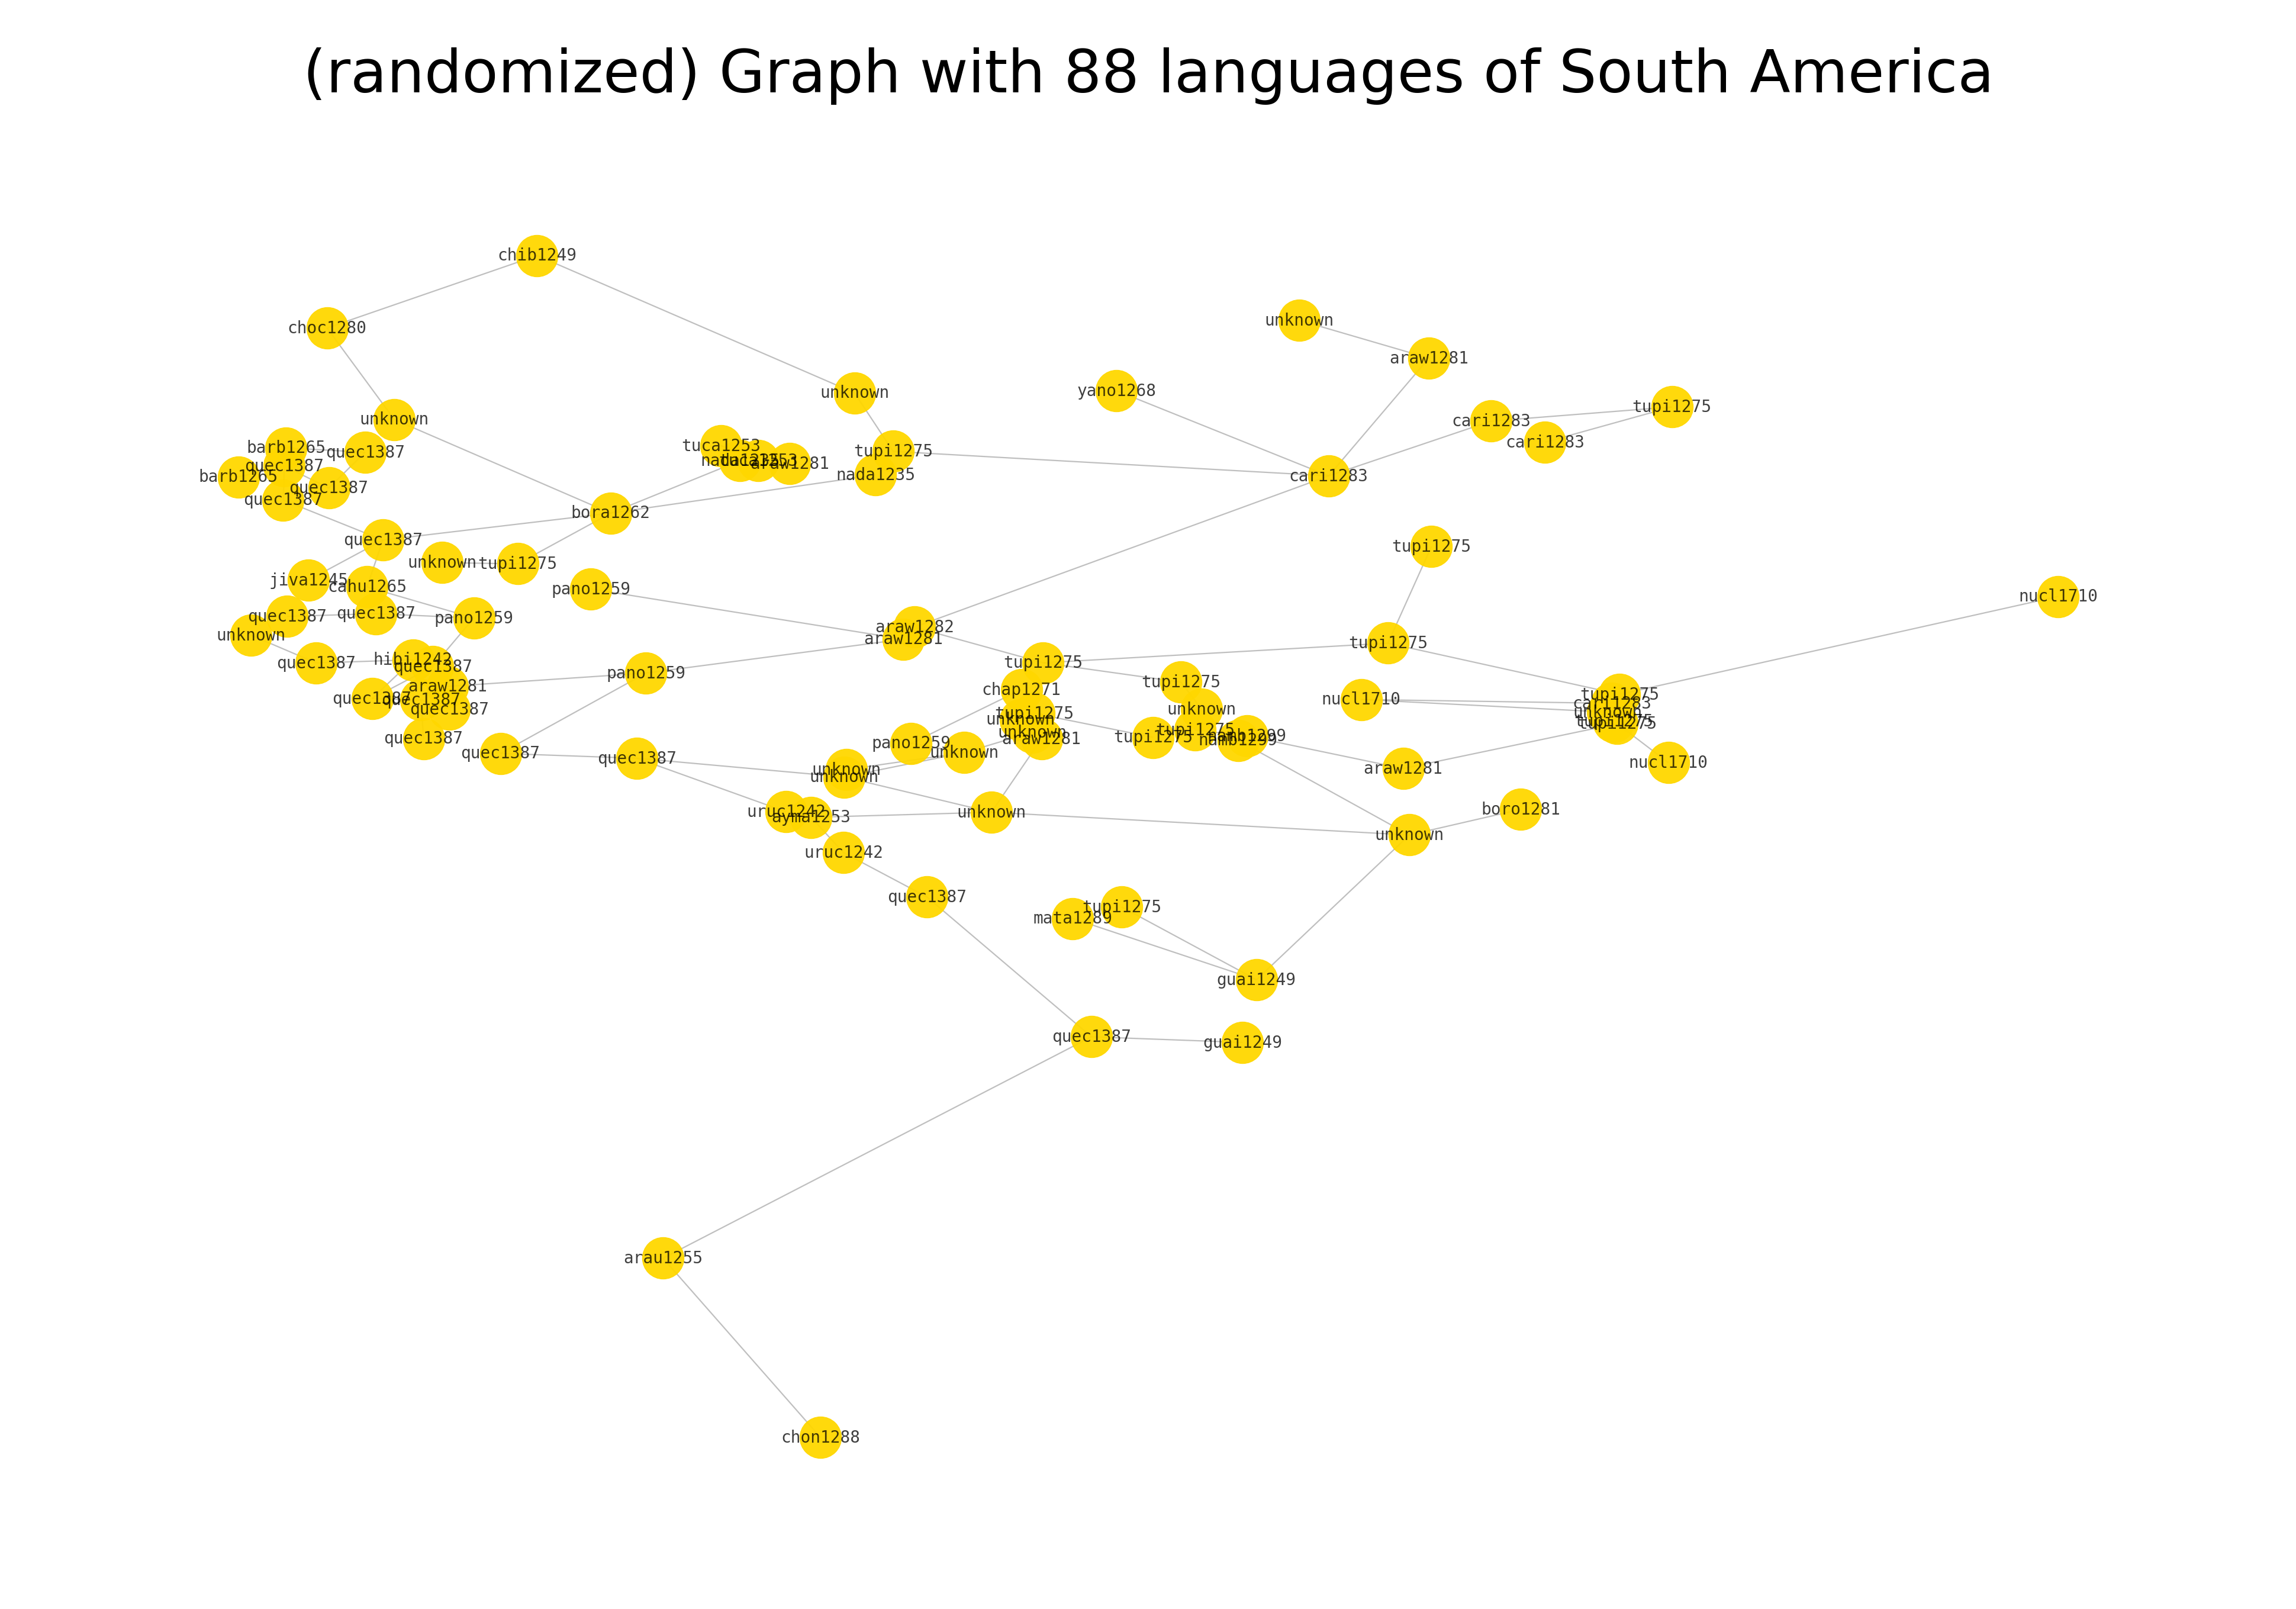

In [75]:
fig, ax = plt.subplots(dpi=800)
labels = {i:id_family[i] for i in Gr.nodes()}# if id_family[i] in ['quec1387','jiva1245','pano1259']}
        
pos = {key:[location[key][1],location[key][0]] for key in location.keys()}#nx.spring_layout(G)
#pos = {key:location[key] for key in g.nodes()}#nx.spectral_layout(g)
#pos = {node: (y,x) for (node, (x,y)) in pos.items()}

nx.draw_networkx_nodes(Gr, pos, node_size = 40, node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
nx.draw_networkx_edges(Gr, pos, alpha=0.5,width=0.2,edge_color='gray')
nx.draw_networkx_labels(Gr,pos,labels,alpha=0.75,font_size=2.5,font_color='k',font_family='monospace')
plt.axis('off')
plt.title('(randomized) Graph with '+str(len(Gr))+' languages of South America',fontsize=9)
plt.savefig('graphr.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## (5) Análisis de correlación

### ¿Cuál es la correlación entre una lengua y sus lenguas vecinas en términos de distancia tipológica?

In [112]:
AND = nx.average_neighbor_degree(G, weight="weight")

In [113]:
ANDr = nx.average_neighbor_degree(Gr, weight="weight")

In [114]:
AD = G.degree(weight="weight")

In [115]:
ADr = Gr.degree(weight="weight")

In [116]:
X = [AD[node] for node in dict(AD).keys()]
Y = [AND[node] for node in dict(AD).keys()]

In [117]:
Xr = [ADr[node] for node in dict(ADr).keys()]
Yr = [ANDr[node] for node in dict(ADr).keys()]

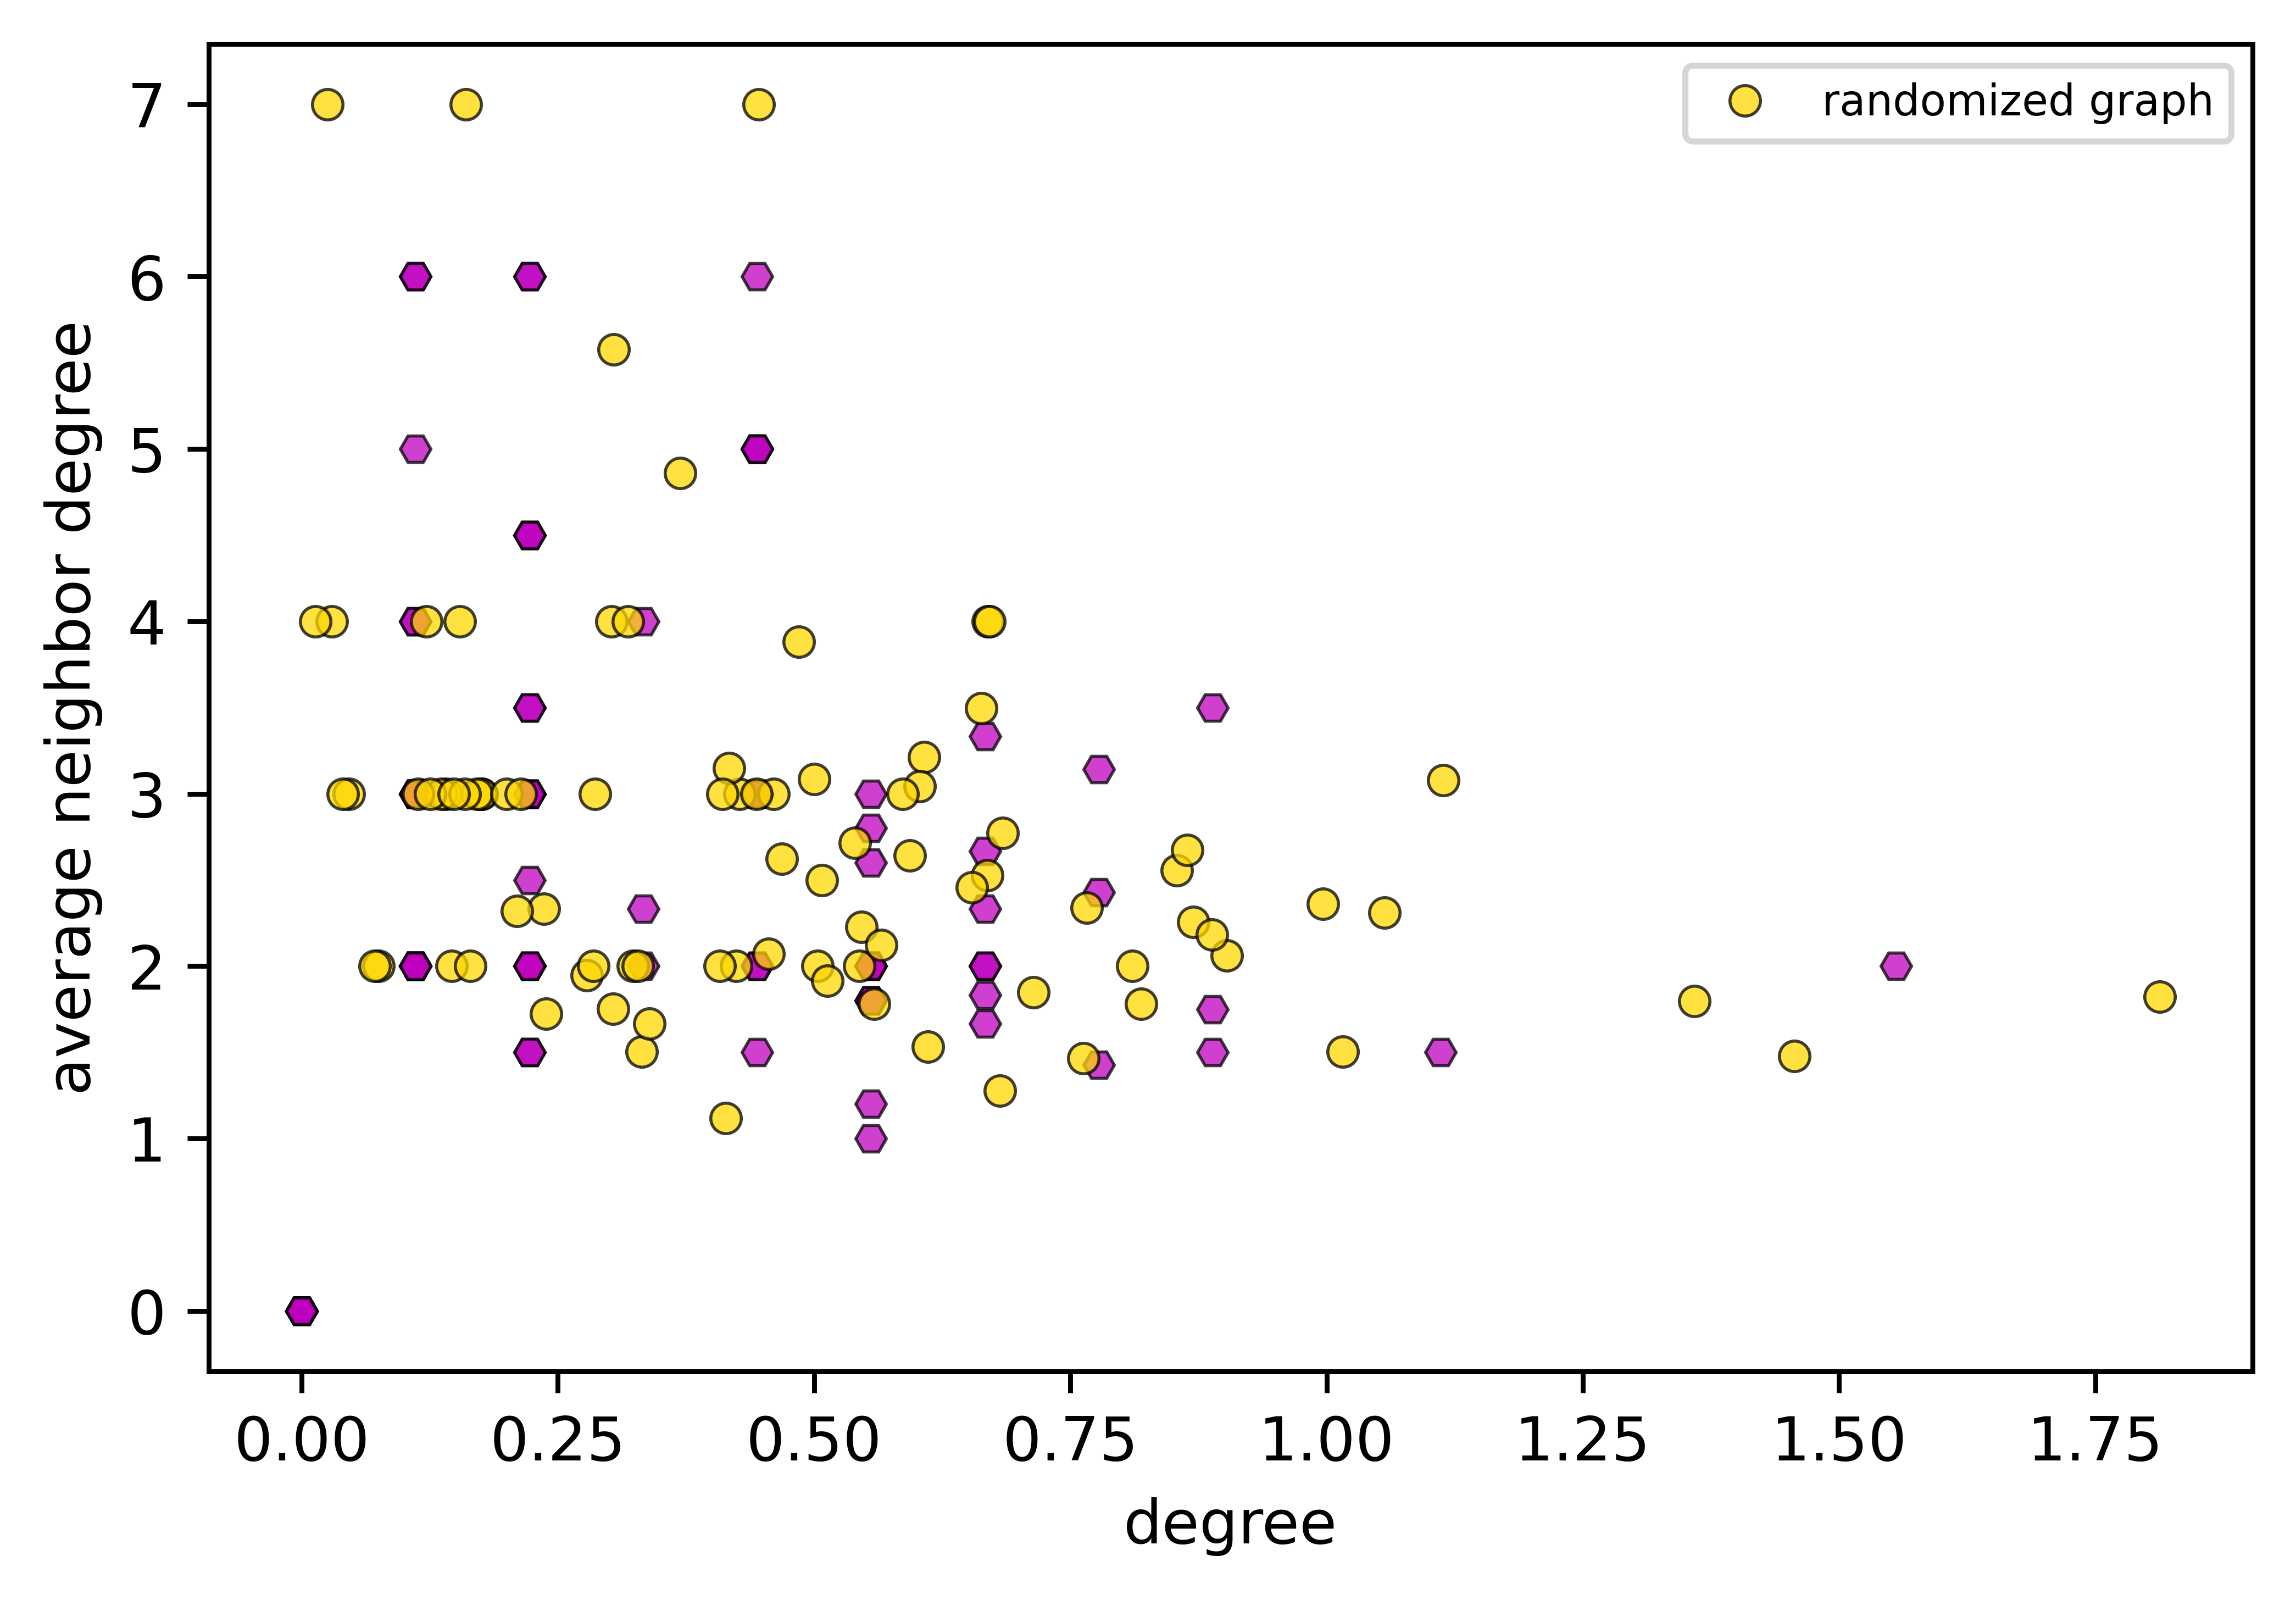

In [118]:
fig, ax = plt.subplots(dpi=800)
#plt.title('obsolescent languages',fontsize=12)
ax.plot(X,Y,marker='H',color='m',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True)
ax.plot(Xr,Yr,marker='o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label='randomized graph')

plt.grid(False)
plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'degree',fontsize=10)
plt.ylabel(r'average neighbor degree',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('advsand.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [119]:
r = nx.degree_assortativity_coefficient(G,weight='weight')

In [120]:
r

0.13351872146444732

In [121]:
rr = nx.degree_assortativity_coefficient(Gr,weight='weight')

In [122]:
rr

0.04165777486719262

## (6) Centralidad

In [76]:
G=GRAPH_knn(neighbors)

In [77]:
Gr=GRAPH_random(neighbors)

In [100]:
import networkx as nx

def plotG_centrality(G,centrality,size):
    fig, ax = plt.subplots(dpi=800)
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:id_family[i] for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:10]))[0]}
    pos = {key:[location[key][1],location[key][0]] for key in location.keys()}#nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = [size*x for x in list(centrality.values())], node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=4,font_color='k',font_family='monospace')
    plt.title(str(10)+' most important languages',fontsize=8)
    plt.axis('off')
    plt.show()

In [101]:
closeness = nx.closeness_centrality(G)

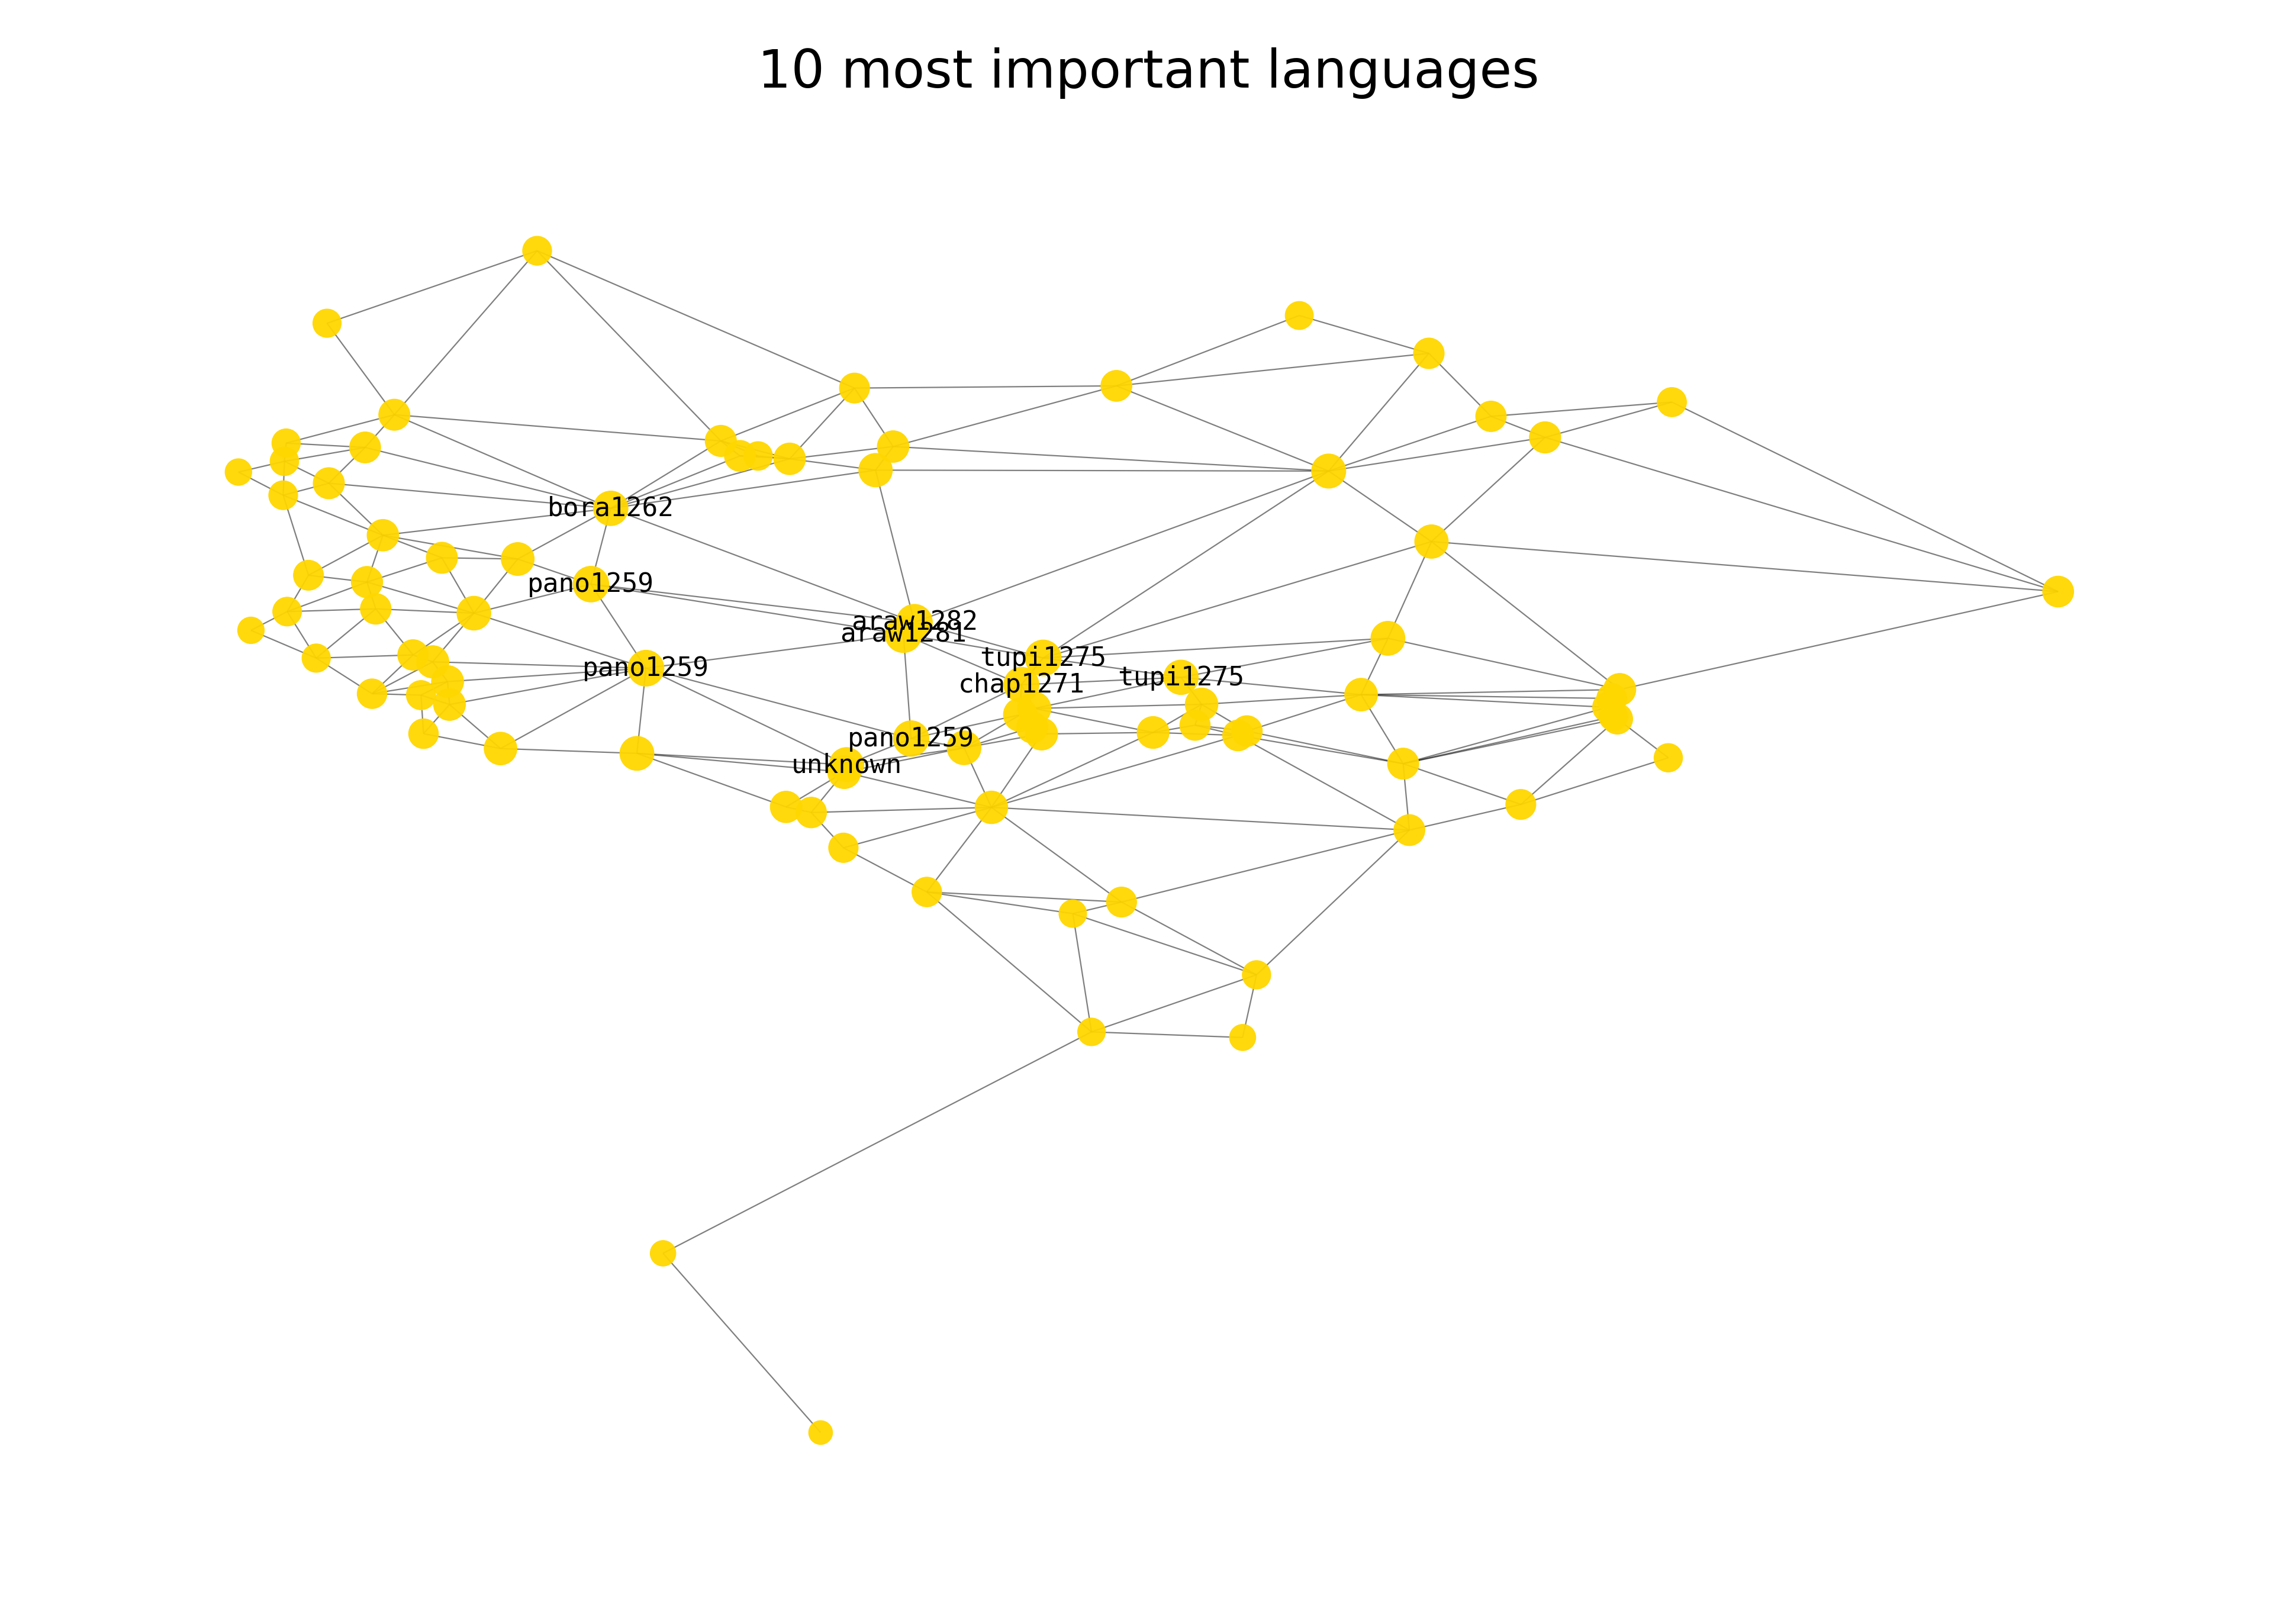

In [102]:
plotG_centrality(G,closeness,100)

In [109]:
betweenness = nx.betweenness_centrality(G,weight='none')

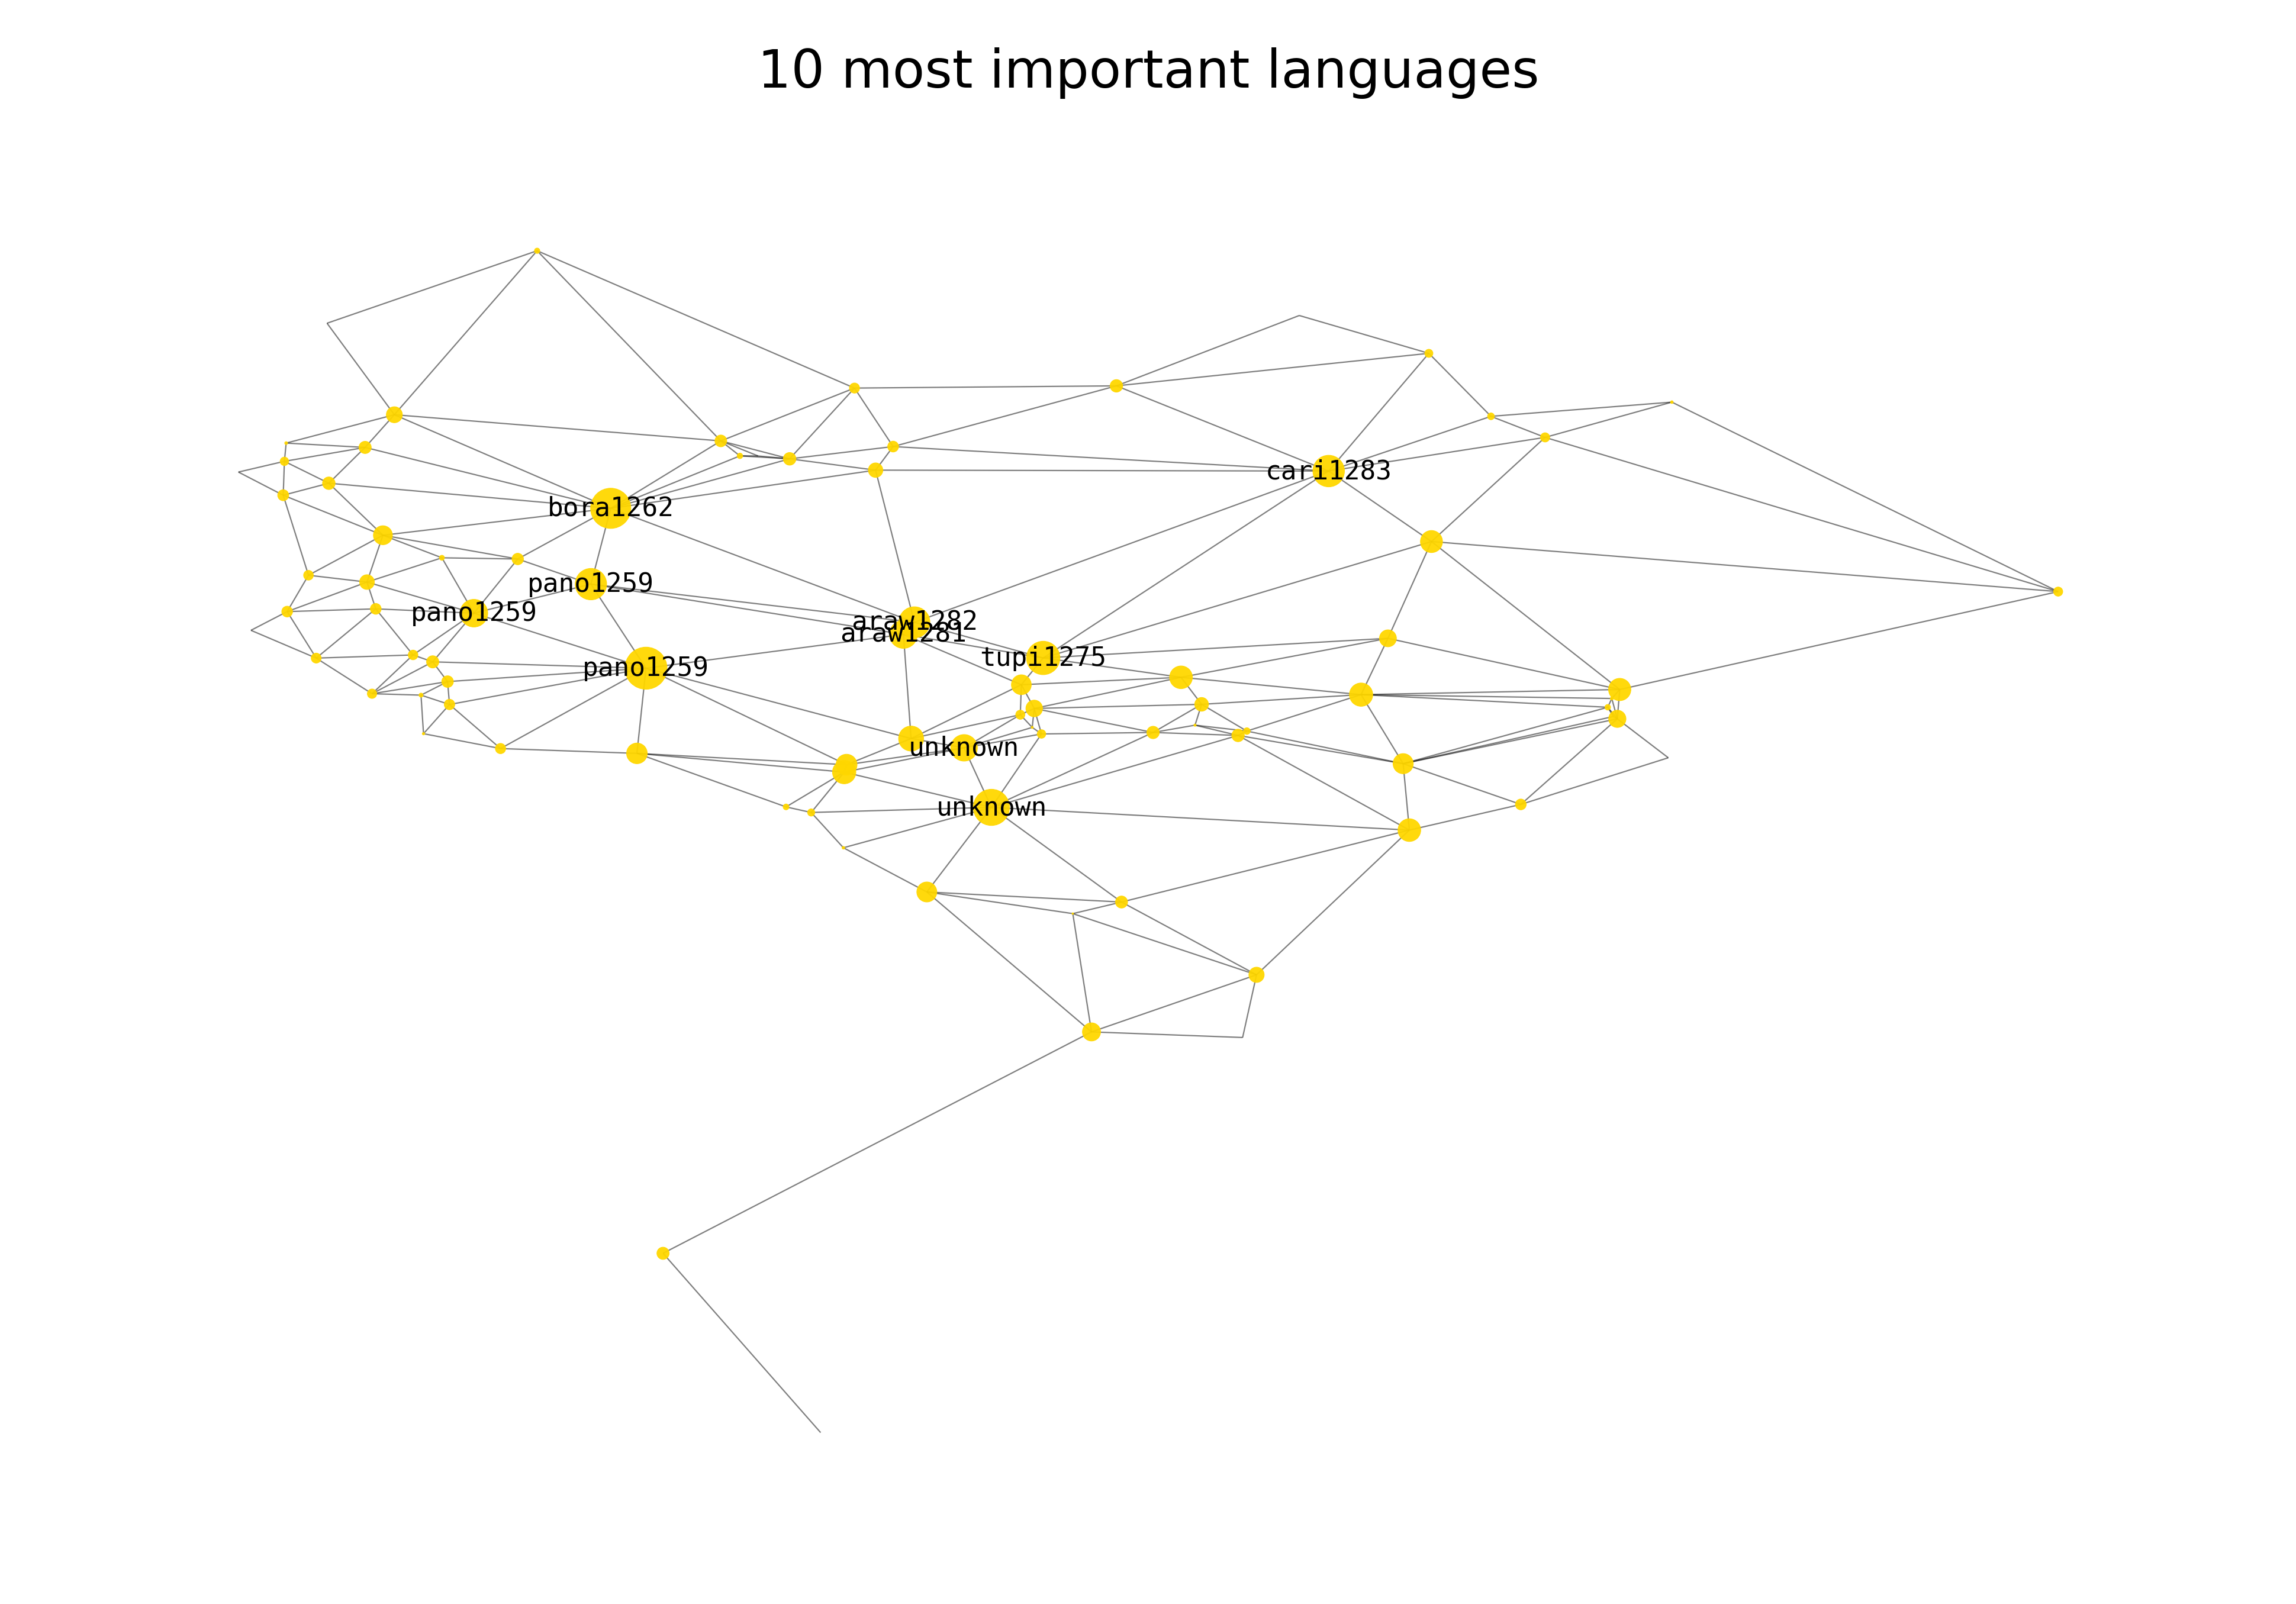

In [110]:
plotG_centrality(G,betweenness,150)

In [115]:
eigenvector = nx.eigenvector_centrality(G,weight='weight',max_iter=1000)

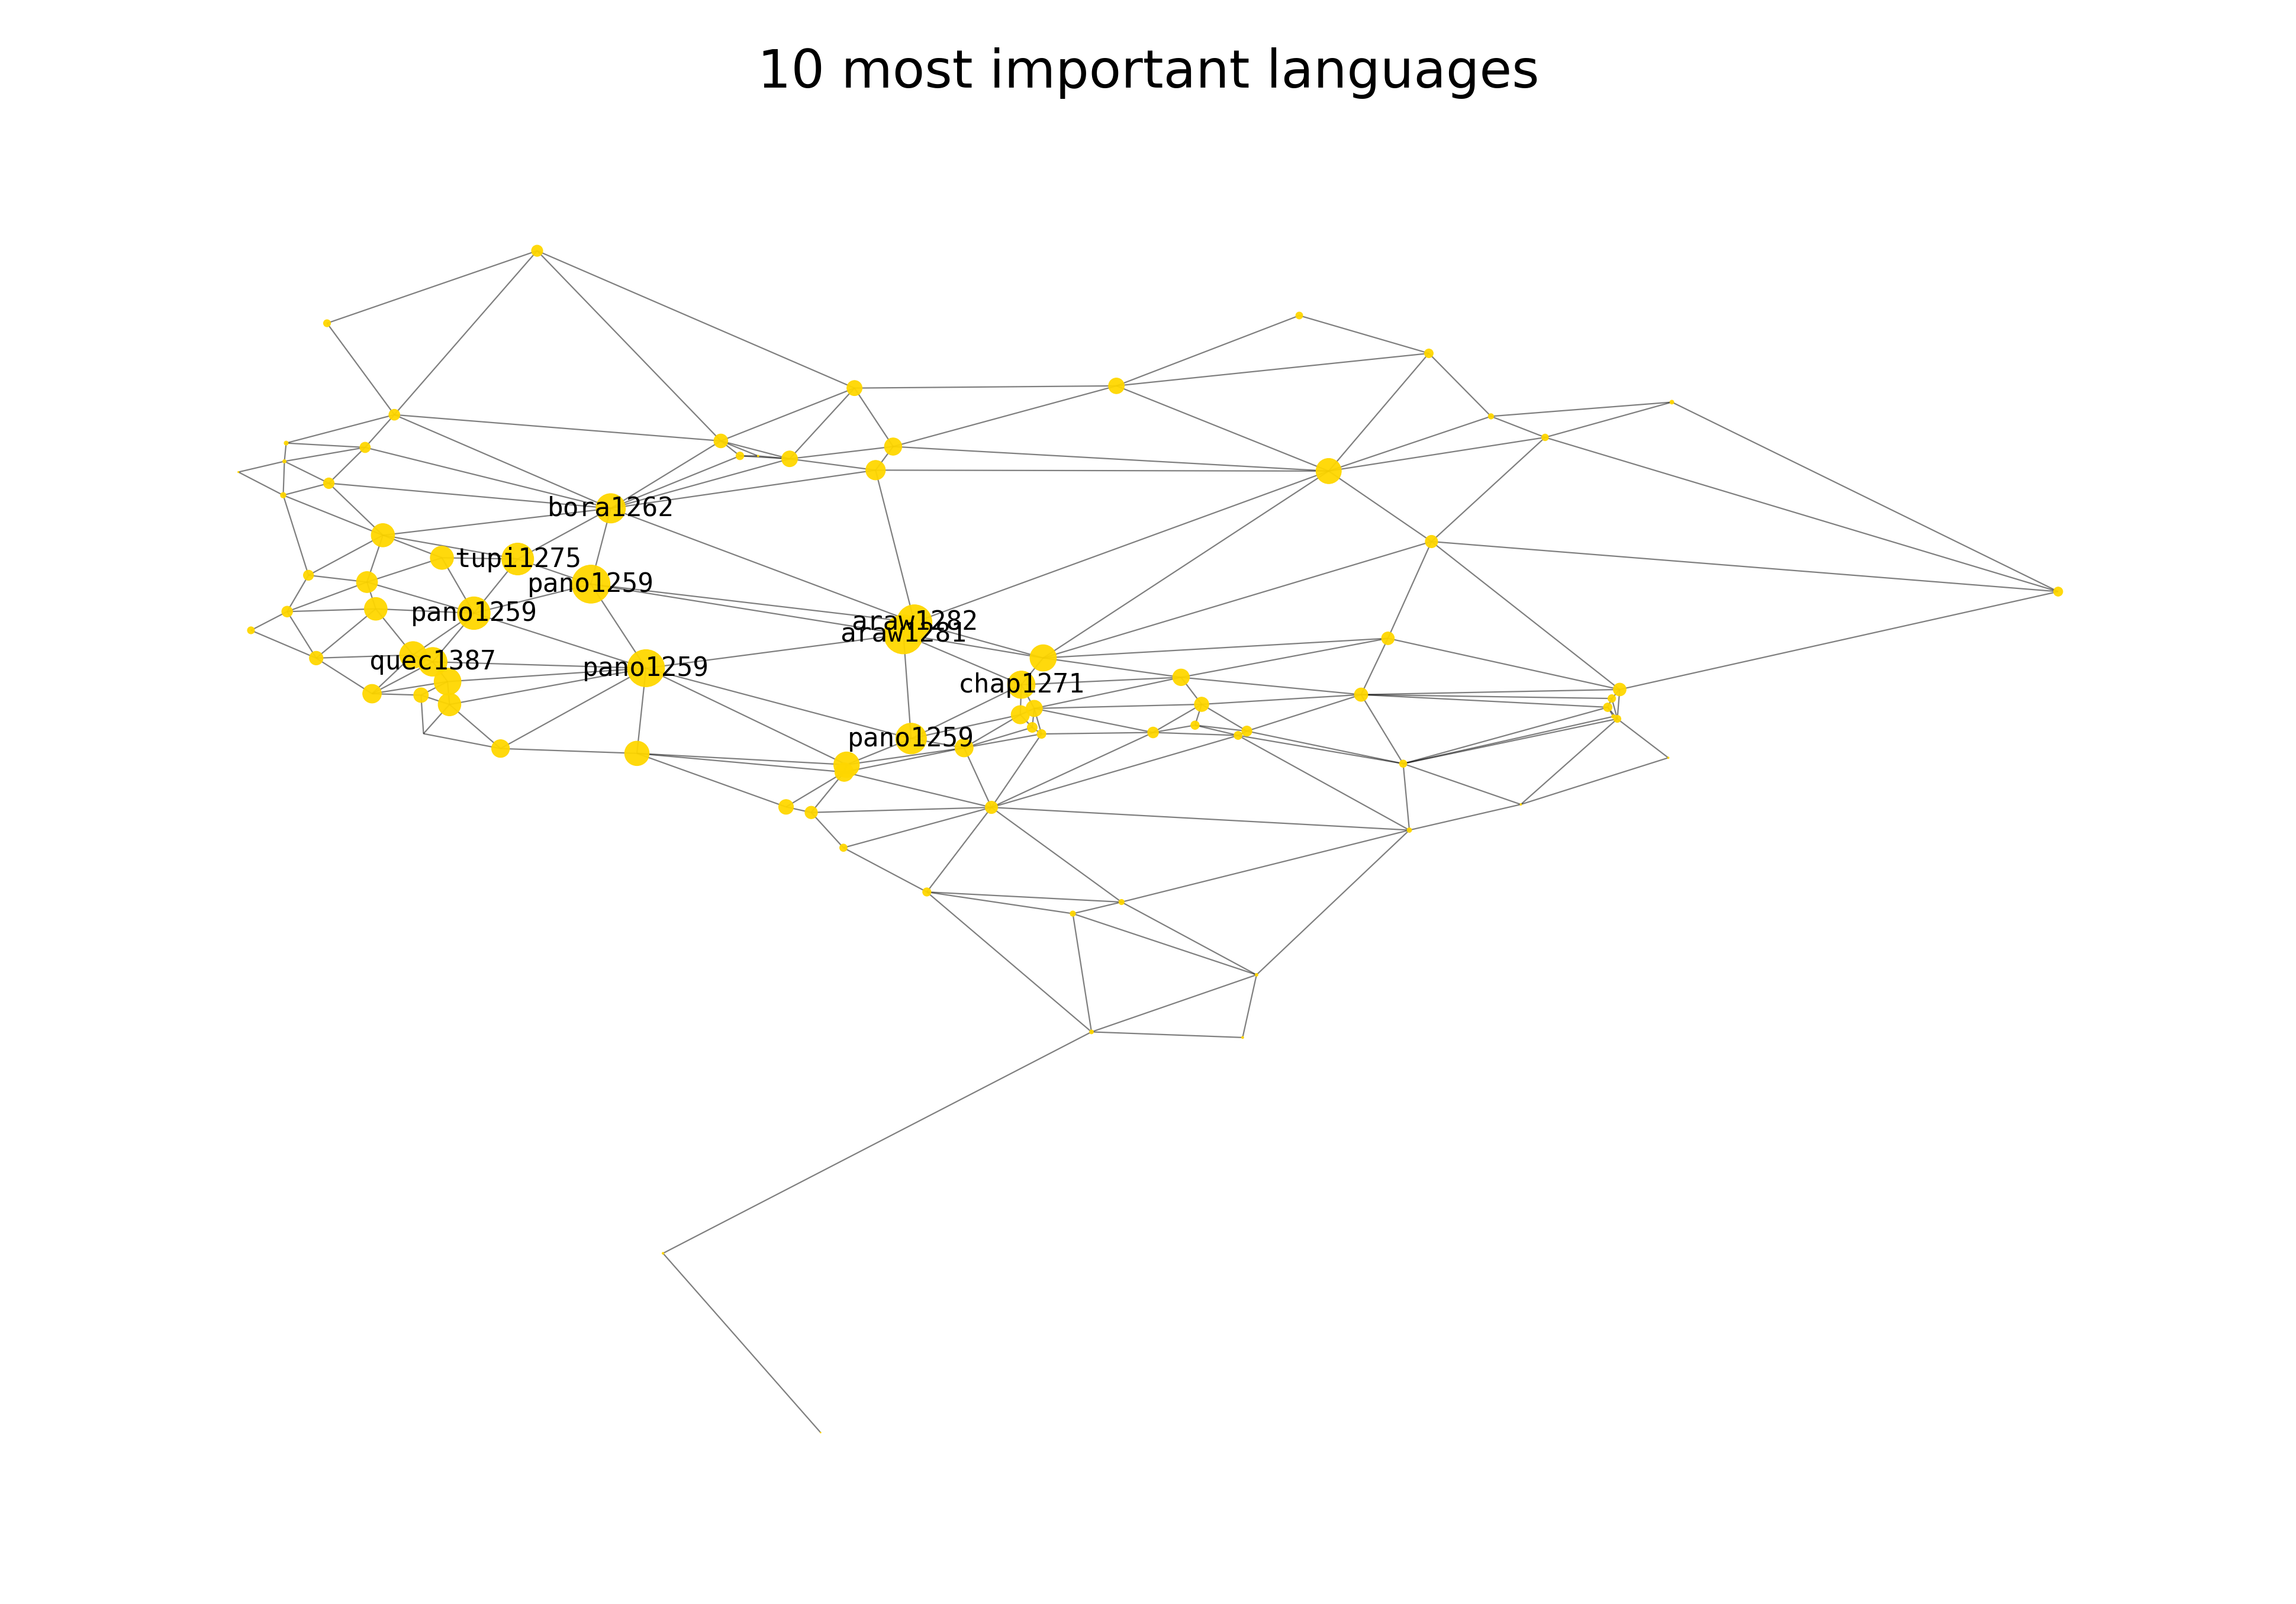

In [116]:
plotG_centrality(G,eigenvector,100)

In [117]:
eigenvector = nx.eigenvector_centrality(G,weight='weight',max_iter=1000)

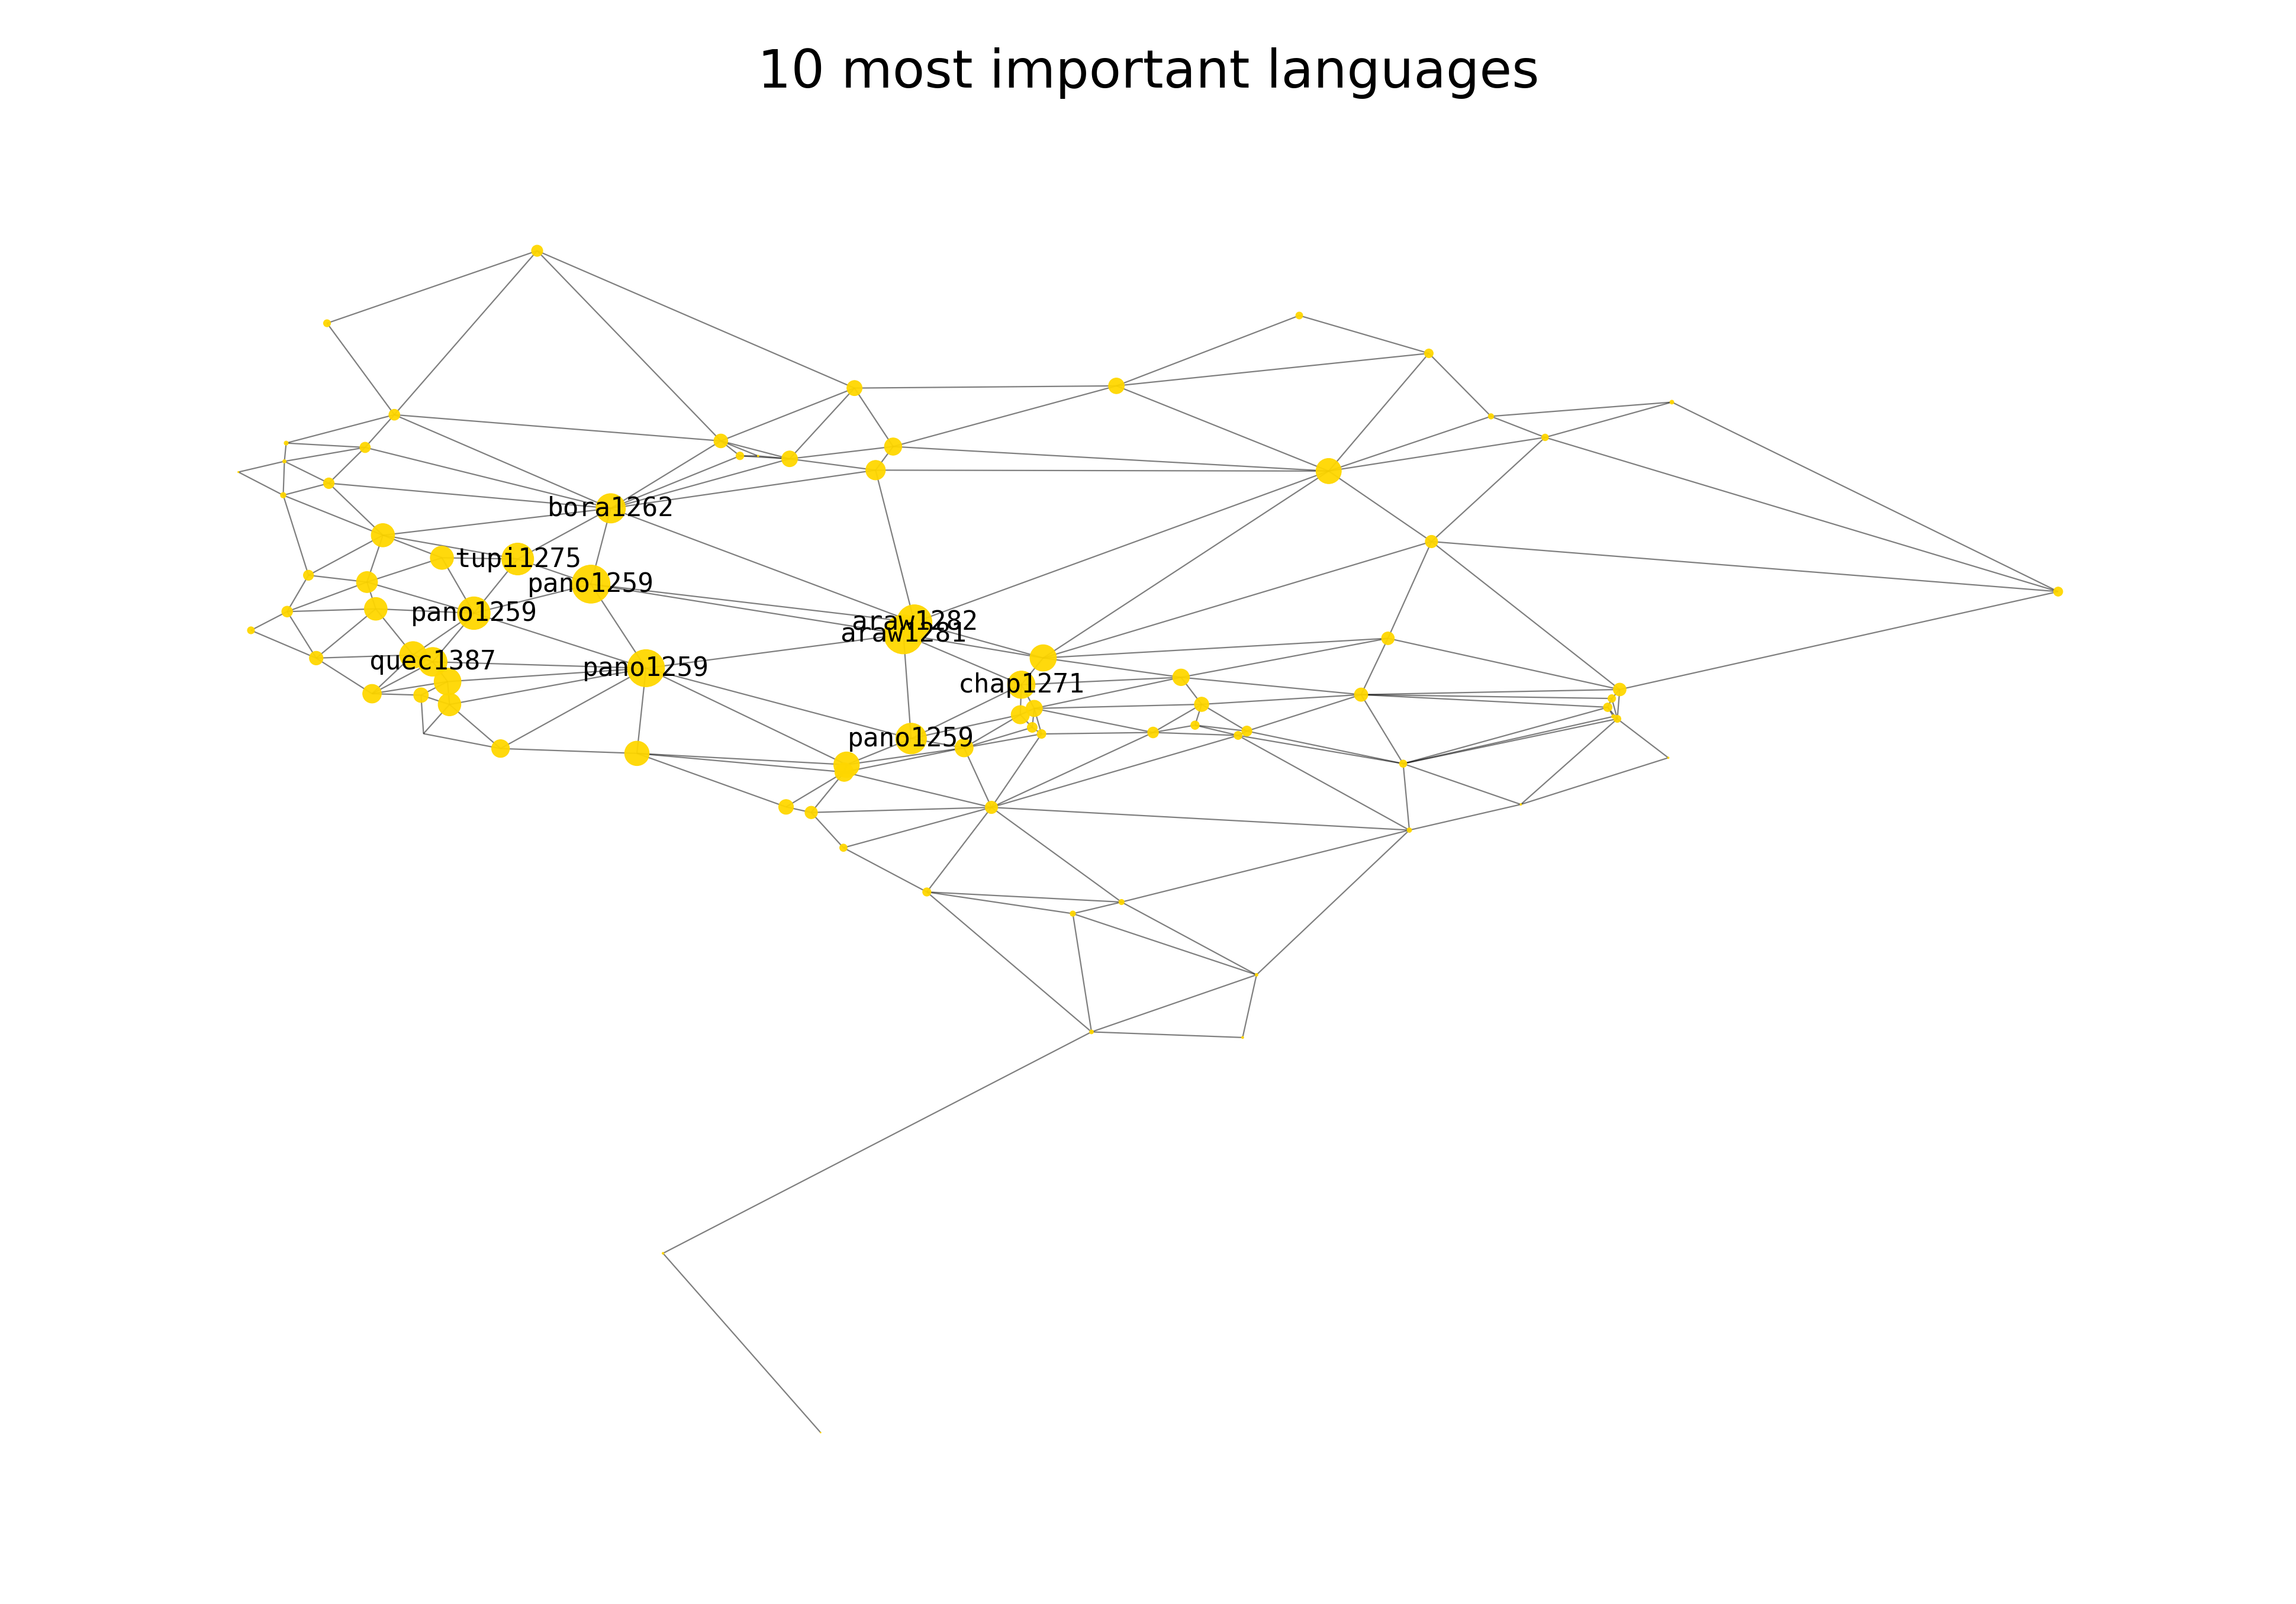

In [118]:
plotG_centrality(G,eigenvector,100)

In [119]:
eigenvectorr = nx.eigenvector_centrality(Gr,weight='weight',max_iter=1000)

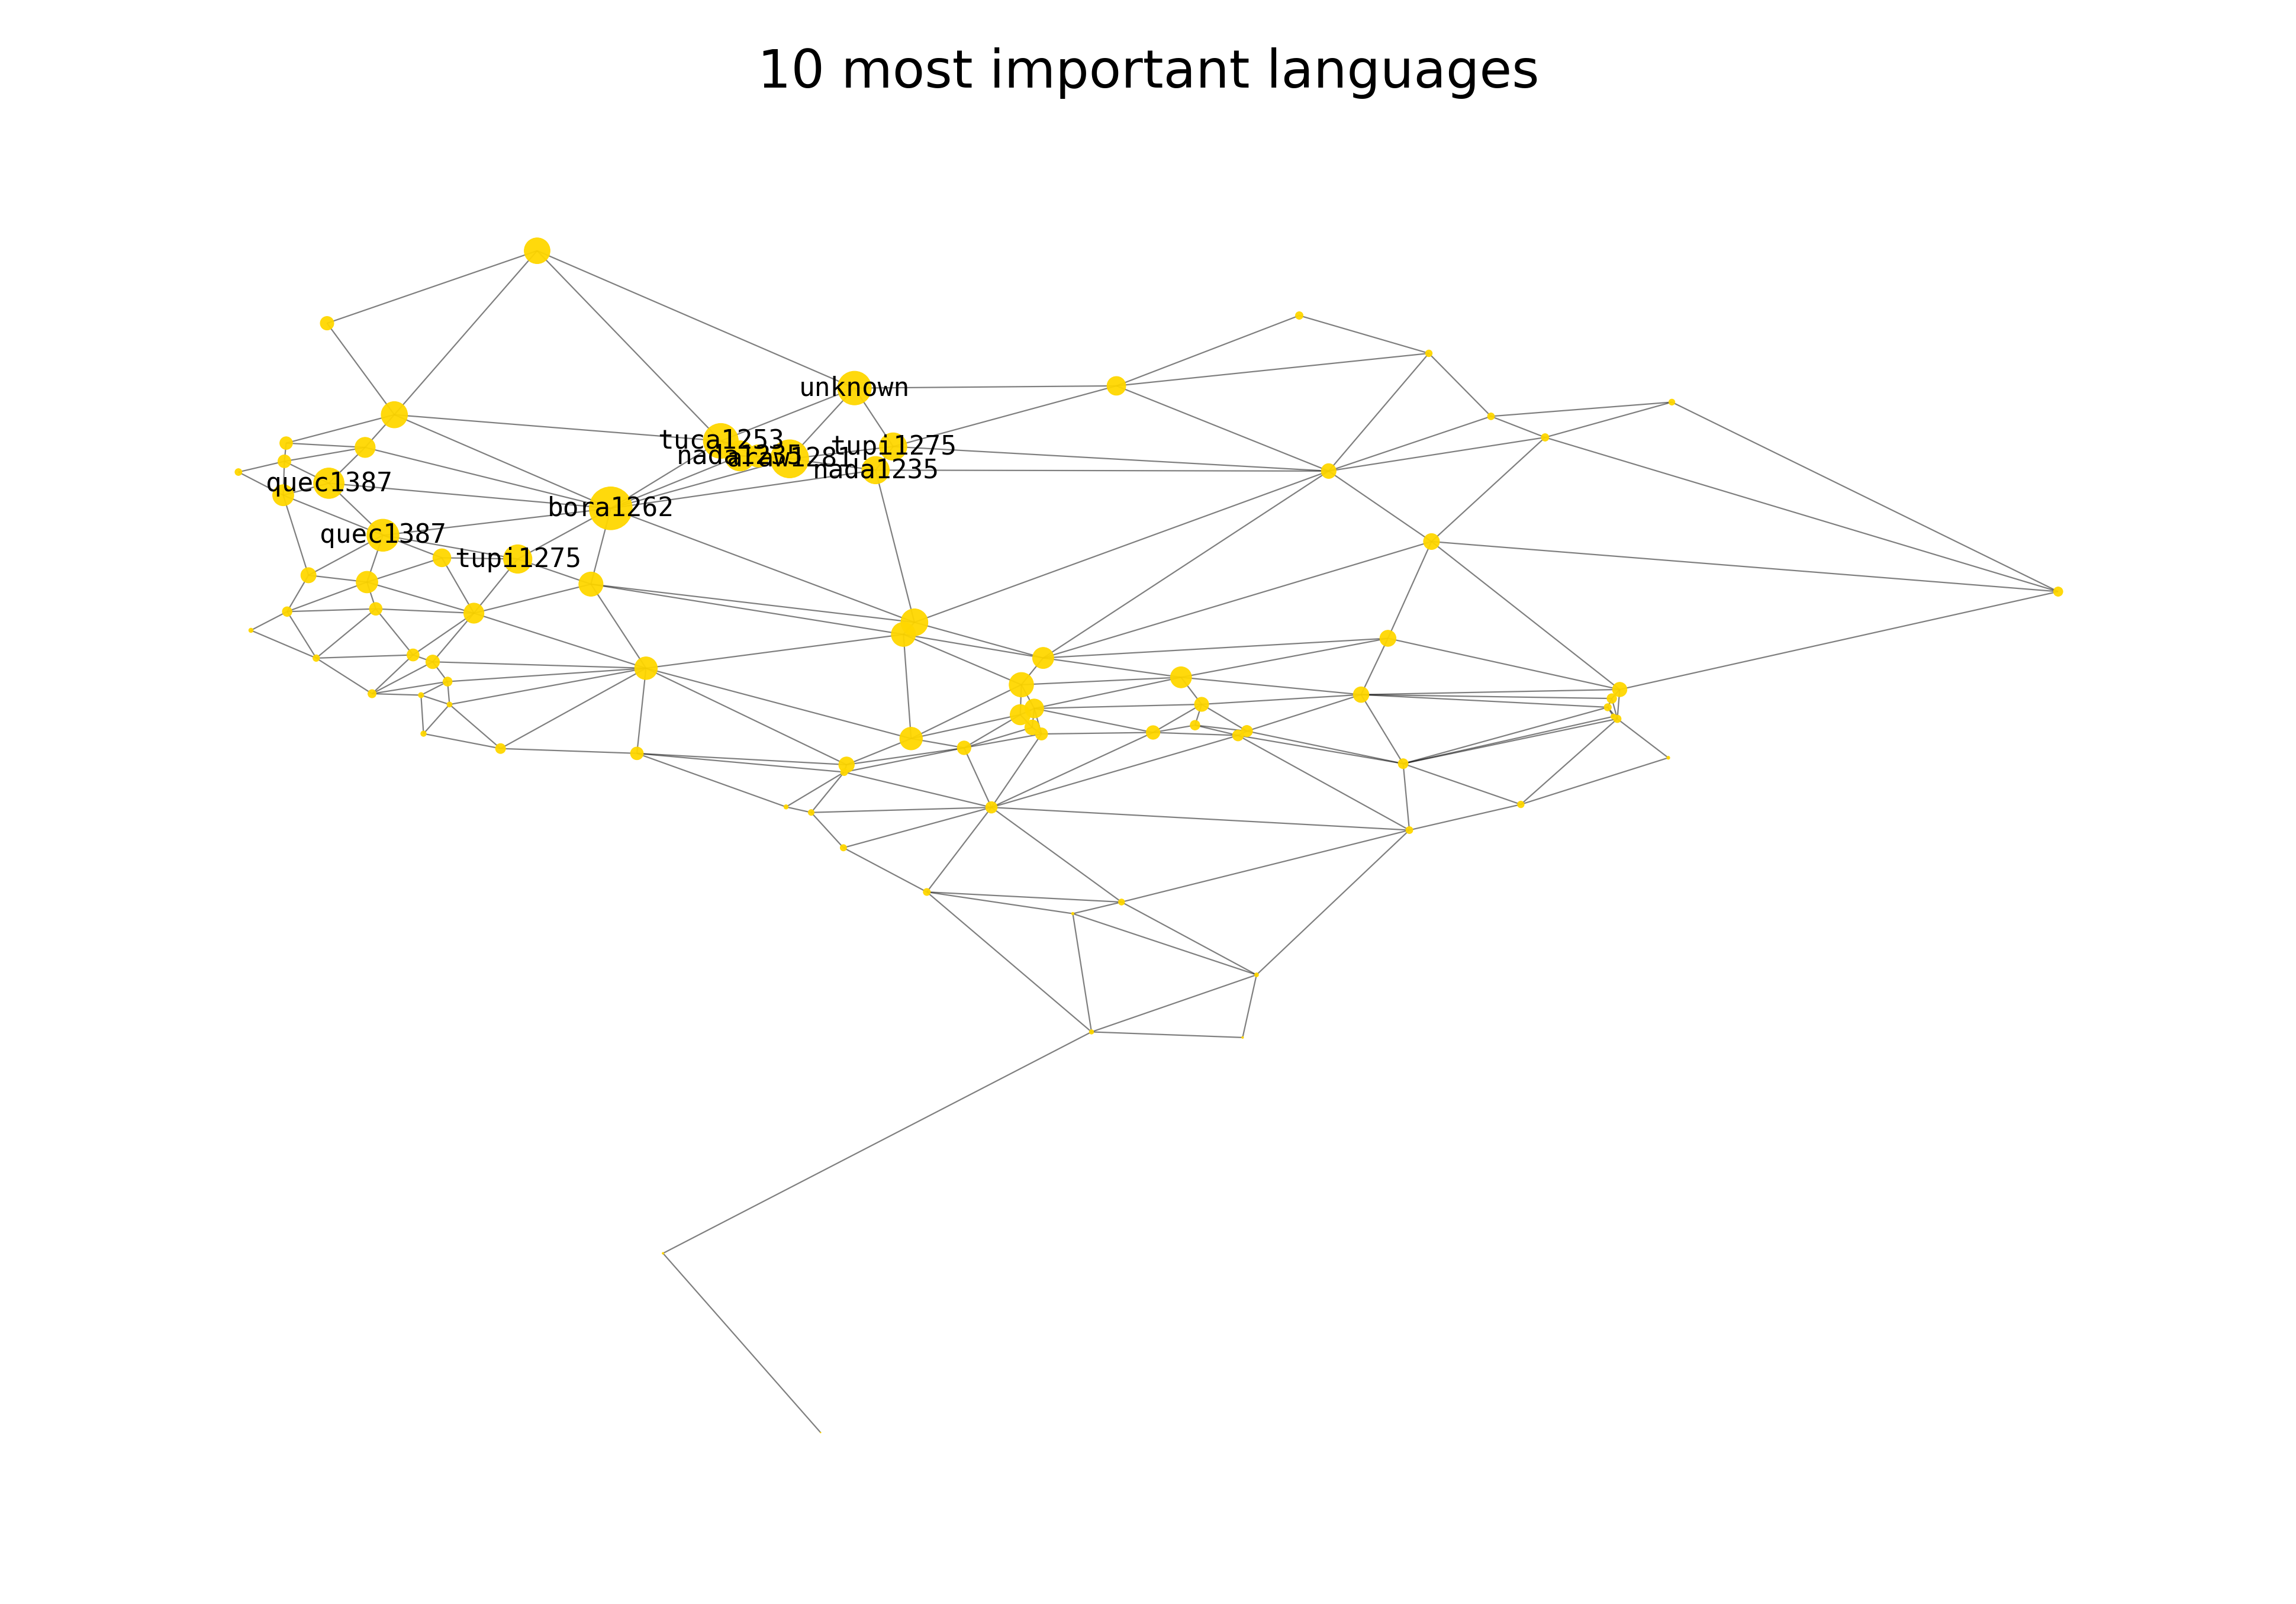

In [120]:
plotG_centrality(Gr,eigenvectorr,100)